# Drift of Data from Gas Concentration Sensors

## Step 1: Data Extraction and Initial Review

In [24]:
import zipfile
import os
from google.colab import drive
drive.mount('/content/gdrive')

# Path to ZIP File
zip_file_path = '/content/gdrive/MyDrive/ColabNotebooks/Term_Project/gas+sensor+array+drift+dataset+at+different+concentrations.zip'

# Destination Folder for Extraction
extracted_folder_path = '/content/gdrive/MyDrive/ColabNotebooks/Term_Project/extracted_gas_sensor_data'

# Extracting Files
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Listing Extracted Files
extracted_files = os.listdir(extracted_folder_path)
extracted_files.sort()
extracted_files

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


['gas+sensor+array+drift+dataset+at+different+concentrations']

In [25]:
# Explore Subfolder to List Data Files
data_folder_path = os.path.join(extracted_folder_path, extracted_files[0])
data_files = os.listdir(data_folder_path)
data_files.sort()
data_files_paths = [os.path.join(data_folder_path, file) for file in data_files]

# Display Paths of Data Files
data_files_paths

['/content/gdrive/MyDrive/ColabNotebooks/Term_Project/extracted_gas_sensor_data/gas+sensor+array+drift+dataset+at+different+concentrations/batch1.dat',
 '/content/gdrive/MyDrive/ColabNotebooks/Term_Project/extracted_gas_sensor_data/gas+sensor+array+drift+dataset+at+different+concentrations/batch10.dat',
 '/content/gdrive/MyDrive/ColabNotebooks/Term_Project/extracted_gas_sensor_data/gas+sensor+array+drift+dataset+at+different+concentrations/batch2.dat',
 '/content/gdrive/MyDrive/ColabNotebooks/Term_Project/extracted_gas_sensor_data/gas+sensor+array+drift+dataset+at+different+concentrations/batch3.dat',
 '/content/gdrive/MyDrive/ColabNotebooks/Term_Project/extracted_gas_sensor_data/gas+sensor+array+drift+dataset+at+different+concentrations/batch4.dat',
 '/content/gdrive/MyDrive/ColabNotebooks/Term_Project/extracted_gas_sensor_data/gas+sensor+array+drift+dataset+at+different+concentrations/batch5.dat',
 '/content/gdrive/MyDrive/ColabNotebooks/Term_Project/extracted_gas_sensor_data/gas+sen

In [26]:
import pandas as pd

# Read the first 5 lines of a data file to get a preview
sample_file_path = data_files_paths[0]
sample_data = pd.read_csv(sample_file_path, sep=" ", header=None, nrows=5)

sample_data.head()



0               1           2            3            4    \
0  1;10.000000  1:15596.162100  2:1.868245   3:2.371604   4:2.803678   
1  1;20.000000  1:26402.070400  2:2.532401   3:5.411209   4:6.509906   
2  1;30.000000  1:42103.582000  2:3.454189   3:8.198175  4:10.508439   
3  1;40.000000  1:42825.988300  2:3.451192  3:12.113940  4:16.266853   
4  1;50.000000  1:58151.175700  2:4.194839  3:11.455096  4:15.715298   

           5             6             7             8               9    ...  \
0   5:7.512213   6:-2.739388   7:-3.344671   8:-4.847512  9:15326.691400  ...   
1   5:7.658469   6:-4.722217   7:-5.817651   8:-7.518333  9:23855.781200  ...   
2  5:11.611003   6:-7.668313   7:-9.478675  8:-12.230939  9:37562.300800  ...   
3  5:39.910056   6:-7.849409   7:-9.689894  8:-11.921704  9:38379.066400  ...   
4  5:17.654915  6:-11.083364  7:-13.580692  8:-16.407848  9:51975.589900  ...   

             120              121           122           123           124  \
0  120:-3.037772  121:3037.039000  122:3.972203  123:0.527291  124:0.728443   
1  120:-1.994993  121:4176.445300  122:4.281373  123:0.980205  124:1.628050   
2  120:-2.867291  121:5914.668500  122:5.396827  123:1.403973  124:2.476956   
3  120:-3.058086  121:6147.474400  122:5.501071  123:1.981933  124:3.569823   
4  120:-4.181920  121:8158.644900  122:7.174334  123:1.993808  124:3.829303   

            125            126            127            128 129  
0  125:1.445783  126:-0.545079  127:-0.902241  128:-2.654529 NaN  
1  125:1.951172  126:-0.889333  127:-1.323505  128:-1.749225 NaN  
2  125:3.039841  126:-1.334558  127:-1.993659  128:-2.348370 NaN  
3  125:4.049197  126:-1.432205  127:-2.146158  128:-2.488957 NaN  
4  125:4.402448  126:-1.930107  127:-2.931265  128:-4.088756 NaN  

[5 rows x 130 columns]

## Step 2: Analysis of Raw Data

The overview of the first lines of the file 'batch1.dat' reveals the following data structure:

* Each line represents an individual measurement.
* The first field of each line contains two pieces of information separated by a semicolon (;): the gas type number (1 to 6 for different gases) and the gas concentration in ppmv.
* The subsequent fields (in the x:v format) represent the features extracted from the sensors, where x is the feature number and v is its value.
* There are 128 features per measurement (as expected), plus the column for the gas type and concentration."

## Step 3: Data Preprocessing

In [27]:
# Function to Transform a Data Line into Tabular Format
def transform_data_row(row):
    # Separation of the Analyte and the Concentration
    gas_type, concentration = row[0].split(';')
    concentration = float(concentration)

    # Extract the Features
    features = {f"feature_{int(f.split(':')[0])}": float(f.split(':')[1]) for f in row[1:] if pd.notnull(f)}

    # Return a Dictionary with the Gas_Type, the Concentration, and the Features
    return {"gas_type": int(gas_type), "concentration": concentration, **features}

# Apply the Transformation to the Data Sample
transformed_sample_data = sample_data.apply(transform_data_row, axis=1, result_type='expand')

transformed_sample_data.head()

gas_type  concentration   feature_1  feature_2  feature_3  feature_4  \
0       1.0           10.0  15596.1621   1.868245   2.371604   2.803678   
1       1.0           20.0  26402.0704   2.532401   5.411209   6.509906   
2       1.0           30.0  42103.5820   3.454189   8.198175  10.508439   
3       1.0           40.0  42825.9883   3.451192  12.113940  16.266853   
4       1.0           50.0  58151.1757   4.194839  11.455096  15.715298   

   feature_5  feature_6  feature_7  feature_8  ...  feature_119  feature_120  \
0   7.512213  -2.739388  -3.344671  -4.847512  ...    -1.071137    -3.037772   
1   7.658469  -4.722217  -5.817651  -7.518333  ...    -1.530519    -1.994993   
2  11.611003  -7.668313  -9.478675 -12.230939  ...    -2.384784    -2.867291   
3  39.910056  -7.849409  -9.689894 -11.921704  ...    -2.607199    -3.058086   
4  17.654915 -11.083364 -13.580692 -16.407848  ...    -3.594763    -4.181920   

   feature_121  feature_122  feature_123  feature_124  feature_125  \
0    3037.0390     3.972203     0.527291     0.728443     1.445783   
1    4176.4453     4.281373     0.980205     1.628050     1.951172   
2    5914.6685     5.396827     1.403973     2.476956     3.039841   
3    6147.4744     5.501071     1.981933     3.569823     4.049197   
4    8158.6449     7.174334     1.993808     3.829303     4.402448   

   feature_126  feature_127  feature_128  
0    -0.545079    -0.902241    -2.654529  
1    -0.889333    -1.323505    -1.749225  
2    -1.334558    -1.993659    -2.348370  
3    -1.432205    -2.146158    -2.488957  
4    -1.930107    -2.931265    -4.088756  

[5 rows x 130 columns]

## Step 4: Data Visualization

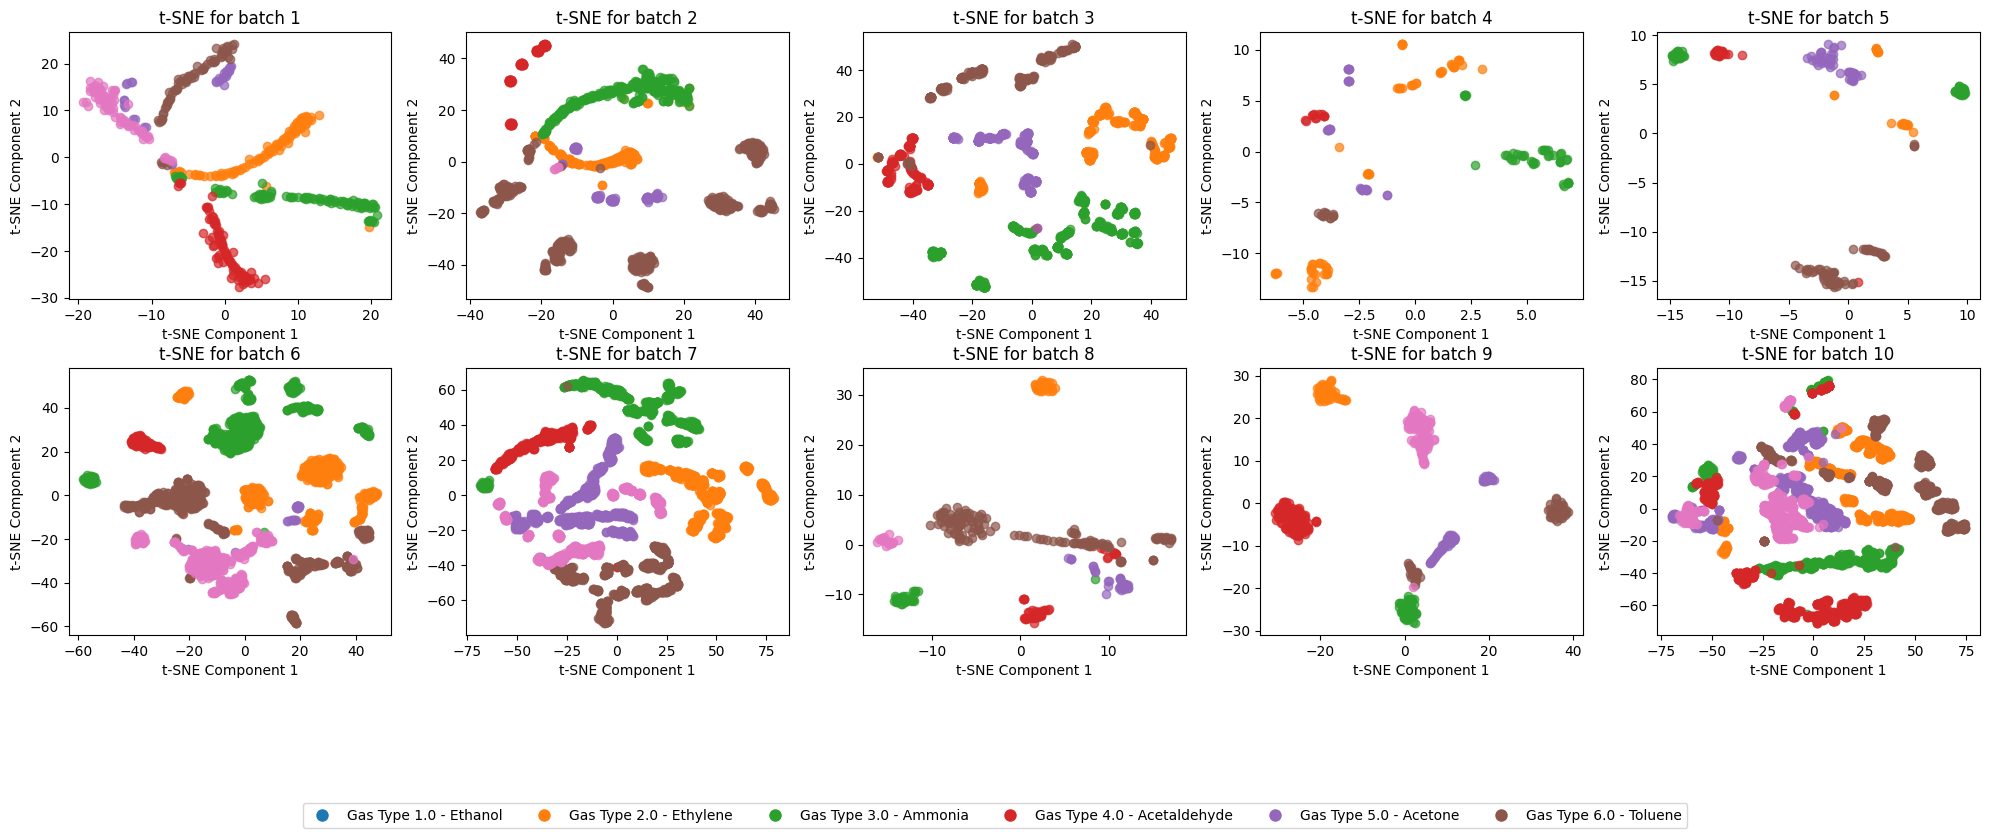

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import pandas as pd
import re

# Function to extract batch number from filename
def extract_batch_number(filepath):
    match = re.search(r'batch(\d+)', filepath)
    return int(match.group(1)) if match else 0

# Sort data_files_paths based on batch number
data_files_paths.sort(key=extract_batch_number)

class_name = {1:'Ethanol', 2:'Ethylene', 3:'Ammonia', 4:'Acetaldehyde', 5:'Acetone', 6:'Toluene'}

# Initialize a figure for subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Define color map for classes
colors = list(mcolors.TABLEAU_COLORS.keys())


# Process each batch separately
for i, batch_file in enumerate(data_files_paths):
    # Parse the batch data
    batch_data = pd.read_csv(batch_file, sep=" ", header=None)
    df = batch_data.apply(transform_data_row, axis=1, result_type='expand')

    # Select only numerical feature columns for t-SNE
    features = [col for col in df.columns if col.startswith('feature_')]
    X = df[features]

    # Scaling the Data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Applying t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    # Visualization with colors and class names
    for label in sorted(df['gas_type'].unique()):
        indices = df['gas_type'] == label
        class_label_name = class_name.get(label, f'Unknown Gas Type {label}')
        # Ensure label is an integer for indexing
        label_index = int(label) % len(colors)
        axes[i].scatter(X_tsne[indices, 0], X_tsne[indices, 1], color=colors[label_index], alpha=0.7, label=class_label_name)

    # Set the title for each subplot
    axes[i].set_title(f't-SNE for batch {i+1}')
    axes[i].set_xlabel('t-SNE Component 1')
    axes[i].set_ylabel('t-SNE Component 2')

# Sort and create handles for legend
sorted_labels = sorted(df['gas_type'].unique())
handles = []
for label in sorted_labels:
    # Ensure label is an integer for indexing
    adjusted_label = int(label) - 1
    label_name = class_name.get(label, f'Unknown Gas Type {label}')
    handle = plt.Line2D([0], [0], marker='o', color='w', label=f'Gas Type {label} - {label_name}',
                        markerfacecolor=colors[adjusted_label % len(colors)], markersize=10)
    handles.append(handle)

fig.legend(handles=handles, loc='lower center', ncol=len(handles), bbox_to_anchor=(0.5, -0.05))

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

The data has been grouped into clusters based on their classes (types of gas), indicating that t-SNE effectively recognized and separate the different patterns between the classes. In the initial batches, class distinctions are clear and well defined, suggesting that sensors readings are accurate. However, over time the classes start overlapping, showing that sensors accuracies are decreasing (sensor drift).

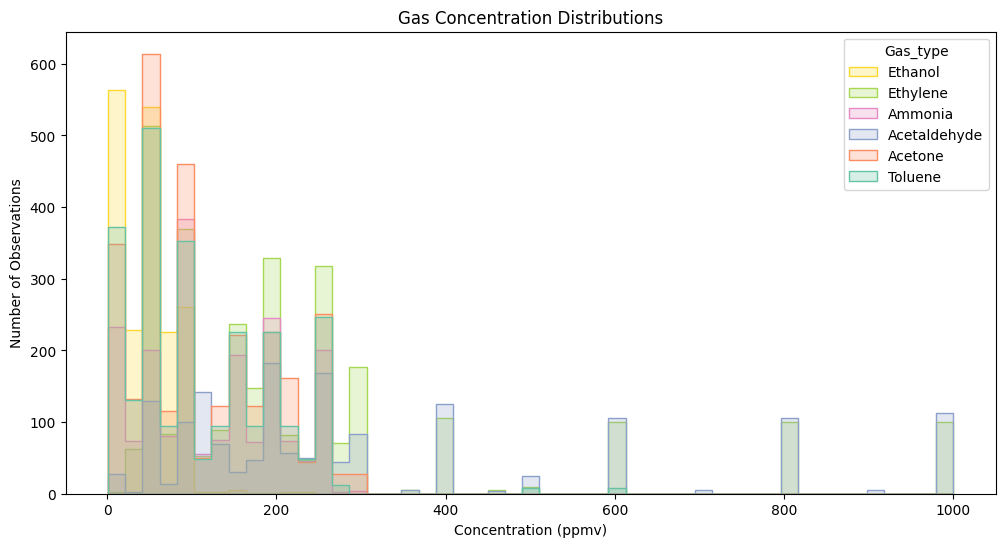

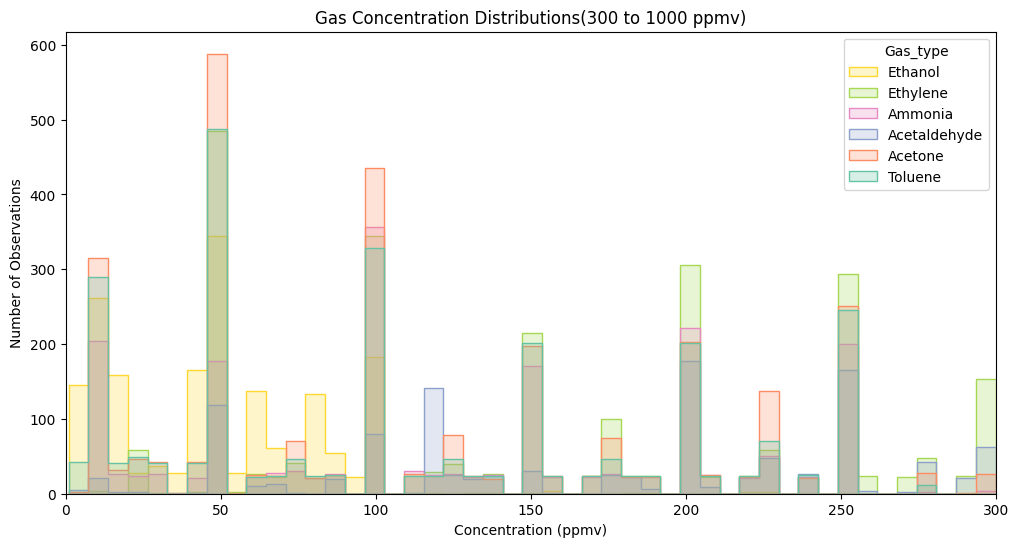

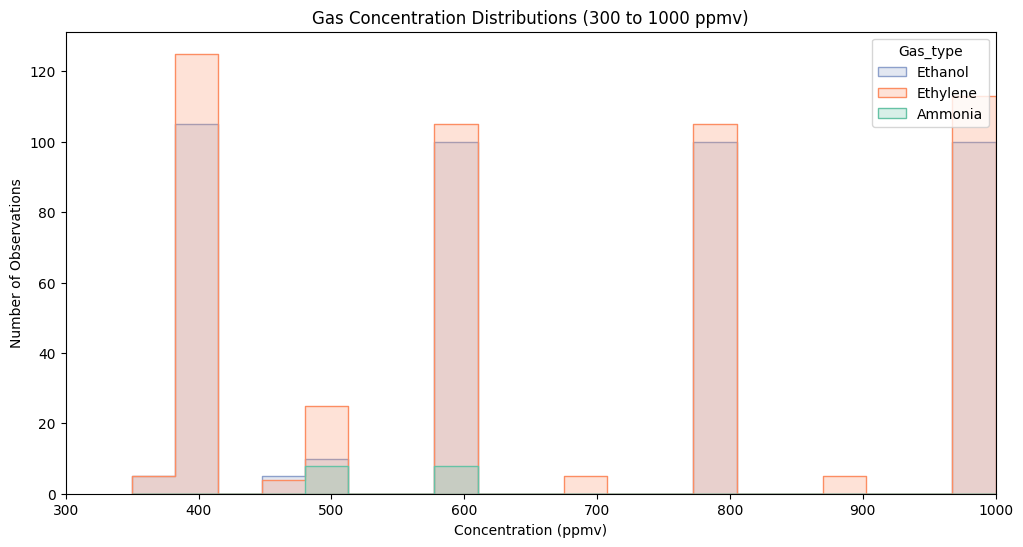

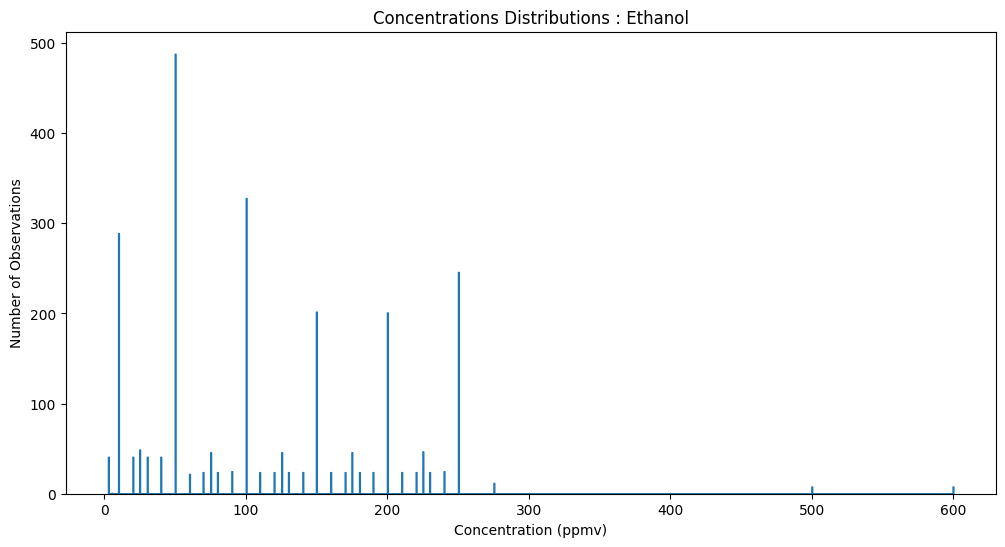

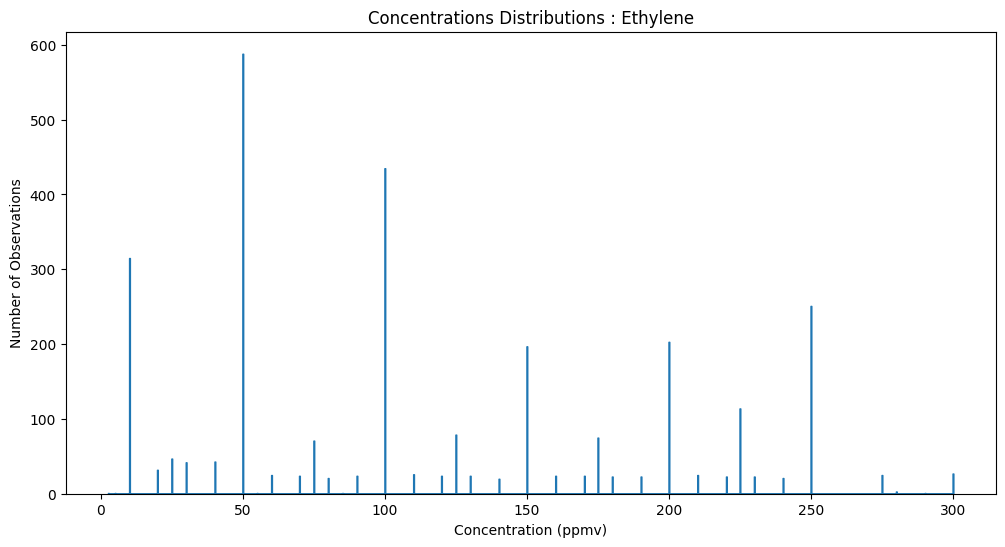

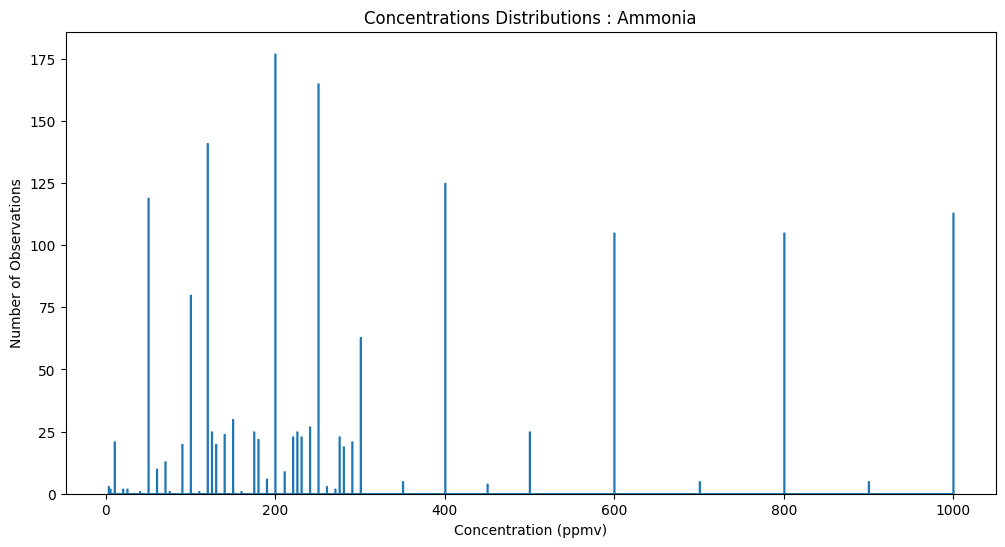

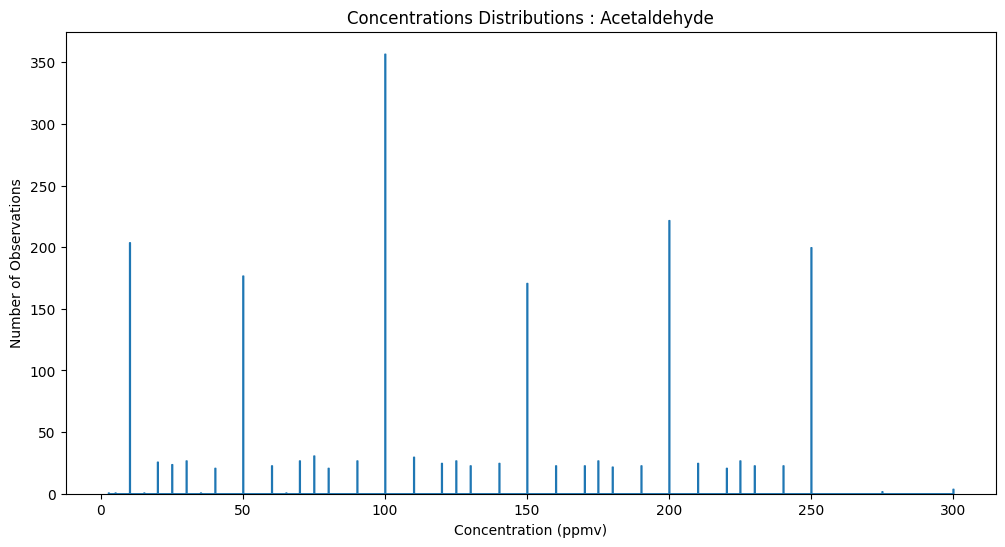

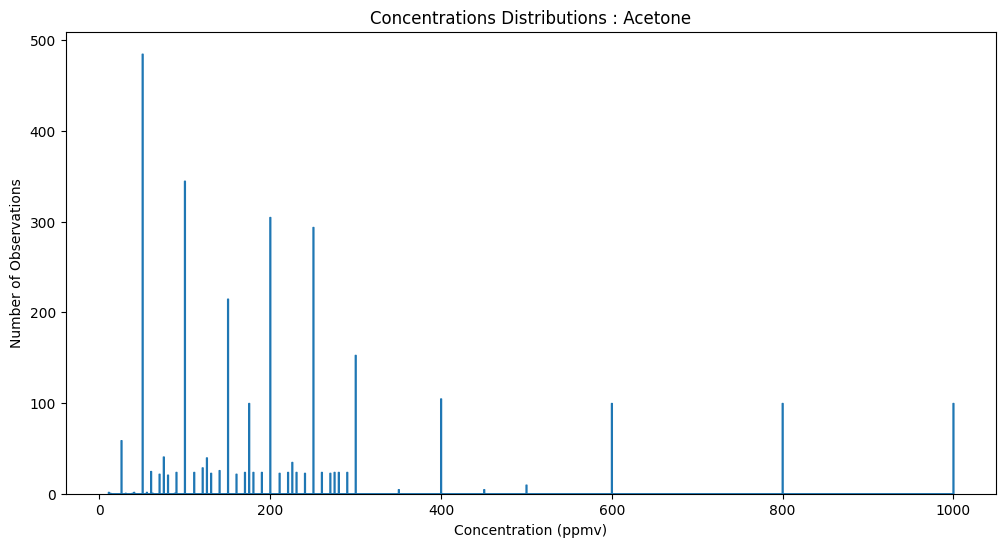

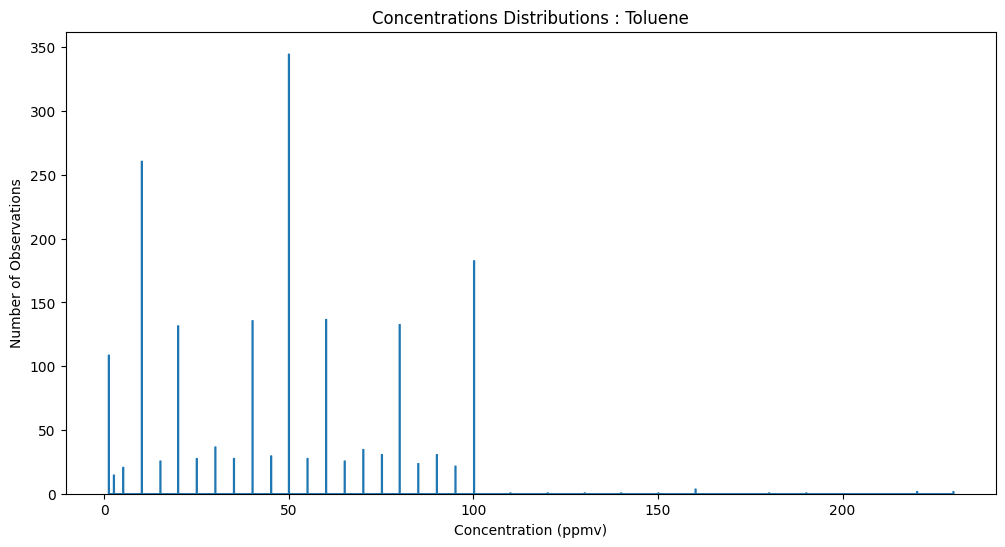

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to Read and Transform Data from a File
def read_and_transform(file_path):
    data = pd.read_csv(file_path, sep=" ", header=None)
    transformed = data.apply(lambda row: {"gas_type": int(row[0].split(';')[0]),
                                          "concentration": float(row[0].split(';')[1])}, axis=1, result_type='expand')
    return transformed

# Paths of Data Files
base_path = '/content/gdrive/MyDrive/ColabNotebooks/Term_Project/extracted_gas_sensor_data/gas+sensor+array+drift+dataset+at+different+concentrations'
file_paths = [f"{base_path}/batch{i}.dat" for i in range(1, 11)]

# Read and Combine All Data
all_data = pd.concat([read_and_transform(fp) for fp in file_paths])

# Histogram of Concentrations for Each Gas
plt.figure(figsize=(12, 6))
sns.histplot(data=all_data, x="concentration", hue="gas_type", element="step", palette="Set2", bins='rice')
plt.title("Gas Concentration Distributions")
plt.xlabel("Concentration (ppmv)")
plt.ylabel("Number of Observations")
plt.legend(title="Gas_type", labels=["Ethanol", "Ethylene", "Ammonia", "Acetaldehyde", "Acetone", "Toluene"])
plt.show()

# Filter Data for Concentration Range of 0 to 300 ppmv
filtered_data_0_300 = all_data[all_data['concentration'] <= 300]

# Histogram of Concentrations for Each Gas in the Filtered Range
plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_data_0_300, x="concentration", hue="gas_type", element="step", palette="Set2", bins='rice')
plt.title("Gas Concentration Distributions(300 to 1000 ppmv)")
plt.xlabel("Concentration (ppmv)")
plt.ylabel("Number of Observations")
plt.legend(title="Gas_type", labels=["Ethanol", "Ethylene", "Ammonia", "Acetaldehyde", "Acetone", "Toluene"])
plt.xlim(0, 300)  # Limit the x-axis to 0-300 ppmv
plt.show()

# Filter Data for Concentration Range of 0 to 300 ppmv
filtered_data_300_1000 = all_data[all_data['concentration'] > 300]

# Histogram of Concentrations for Each Gas in the Filtered Range
plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_data_300_1000, x="concentration", hue="gas_type", element="step", palette="Set2", bins='rice')
plt.title("Gas Concentration Distributions (300 to 1000 ppmv)")
plt.xlabel("Concentration (ppmv)")
plt.ylabel("Number of Observations")
plt.legend(title="Gas_type", labels=["Ethanol", "Ethylene", "Ammonia", "Acetaldehyde", "Acetone", "Toluene"])
plt.xlim(300, 1000)  # Limit the x-axis to 0-300 ppmv
plt.show()

labels=["Ethanol", "Ethylene", "Ammonia", "Acetaldehyde", "Acetone", "Toluene"]
for gas in range(1, 7):
    plt.figure(figsize=(12, 6))
    sns.histplot(data=all_data[all_data.gas_type == gas], x="concentration", element="step", bins=1000)
    plt.title(f"Concentrations Distributions : {labels[gas-1]}")
    plt.xlabel("Concentration (ppmv)")
    plt.ylabel("Number of Observations")
    plt.show()

### Range 0-300 ppmv
**Missing Data at Certain Concentration Levels**:
- There are marked peaks at specific concentration levels (0, 50, 100, 150, 200, 250 ppmv), which suggests that measurements were taken at predetermined concentration points rather than continuously. This could reflect the experimental protocol or the capabilities of the measuring device.

**Implications for Calibration**:
- The presence of these peaks at certain concentrations indicate that calibrating sensors at these exact levels could lead to more accurate readings. Without information on levels between these points, it might be hard for machine learning models to guess the values in those gaps correctly

**Sensor Variability**:
- Differences in how sensors react to the same concentration levels might show that they don't all work the same way or with the same precision. This could mean they need careful calibration to work correctly.

### Range 300-1000 ppmv

**Data Discontinuity**:
* The distribution clearly shows measurements mainly at multiples of 100 ppmv (and a bit at 350 and 450).This may mean the data was collected at certain levels on purpose to see how sensors deal with high concentrations.

**Data Utility**:
* Even if the measurements are discontinuous, they can be useful for training models to recognize situations of high exposure, which is often crucial for safety or environmental monitoring applications."

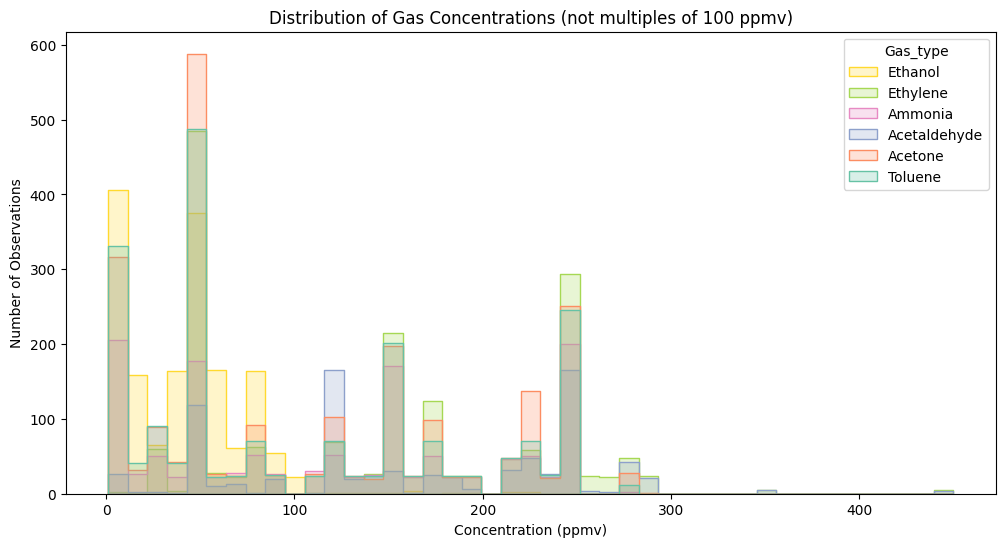

In [29]:
# Filter to exclude multiples of 100 ppmv
non_multiples_100 = all_data[~all_data['concentration'].mod(100).eq(0)]

# Histogram of concentrations for each gas excluding multiples of 100 ppmv
plt.figure(figsize=(12, 6))
sns.histplot(data=non_multiples_100, x="concentration", hue="gas_type", element="step", palette="Set2", bins='rice')
plt.title("Distribution of Gas Concentrations (not multiples of 100 ppmv)")
plt.xlabel("Concentration (ppmv)")
plt.ylabel("Number of Observations")
plt.legend(title="Gas_type", labels=["Ethanol", "Ethylene", "Ammonia", "Acetaldehyde", "Acetone", "Toluene"])
plt.show()

From the chart, we can see that ethanol has a more consistent and continuous distribution of measurements across lower concentrations especially below 100 ppmv, unlike other gases which have measurements that are more spread out or occur at higher concentrations. This allows for better calibration and model accuracy for ethanol detection. Creating a separate model for ethanol could be beneficial, especially if its precise measurement is important for safety or other applications.

For other gases, the distribution of concentrations is more disparate and presents significant gaps, and it might be necessary to consider different strategies, such as:

* **Data Aggregation**: Grouping data into concentration categories for which you have enough measurements to form a robust model.

* **Use of Non-Linear Models**: Employing Machine Learning models capable of handling steps in the data, such as decision trees or models that use complex mappings.

* **Smoothing Techniques**: Applying data smoothing techniques which fill in gaps in the data to make it look smoother, but this can make the model less accurate if it assumes patterns that aren't really there.

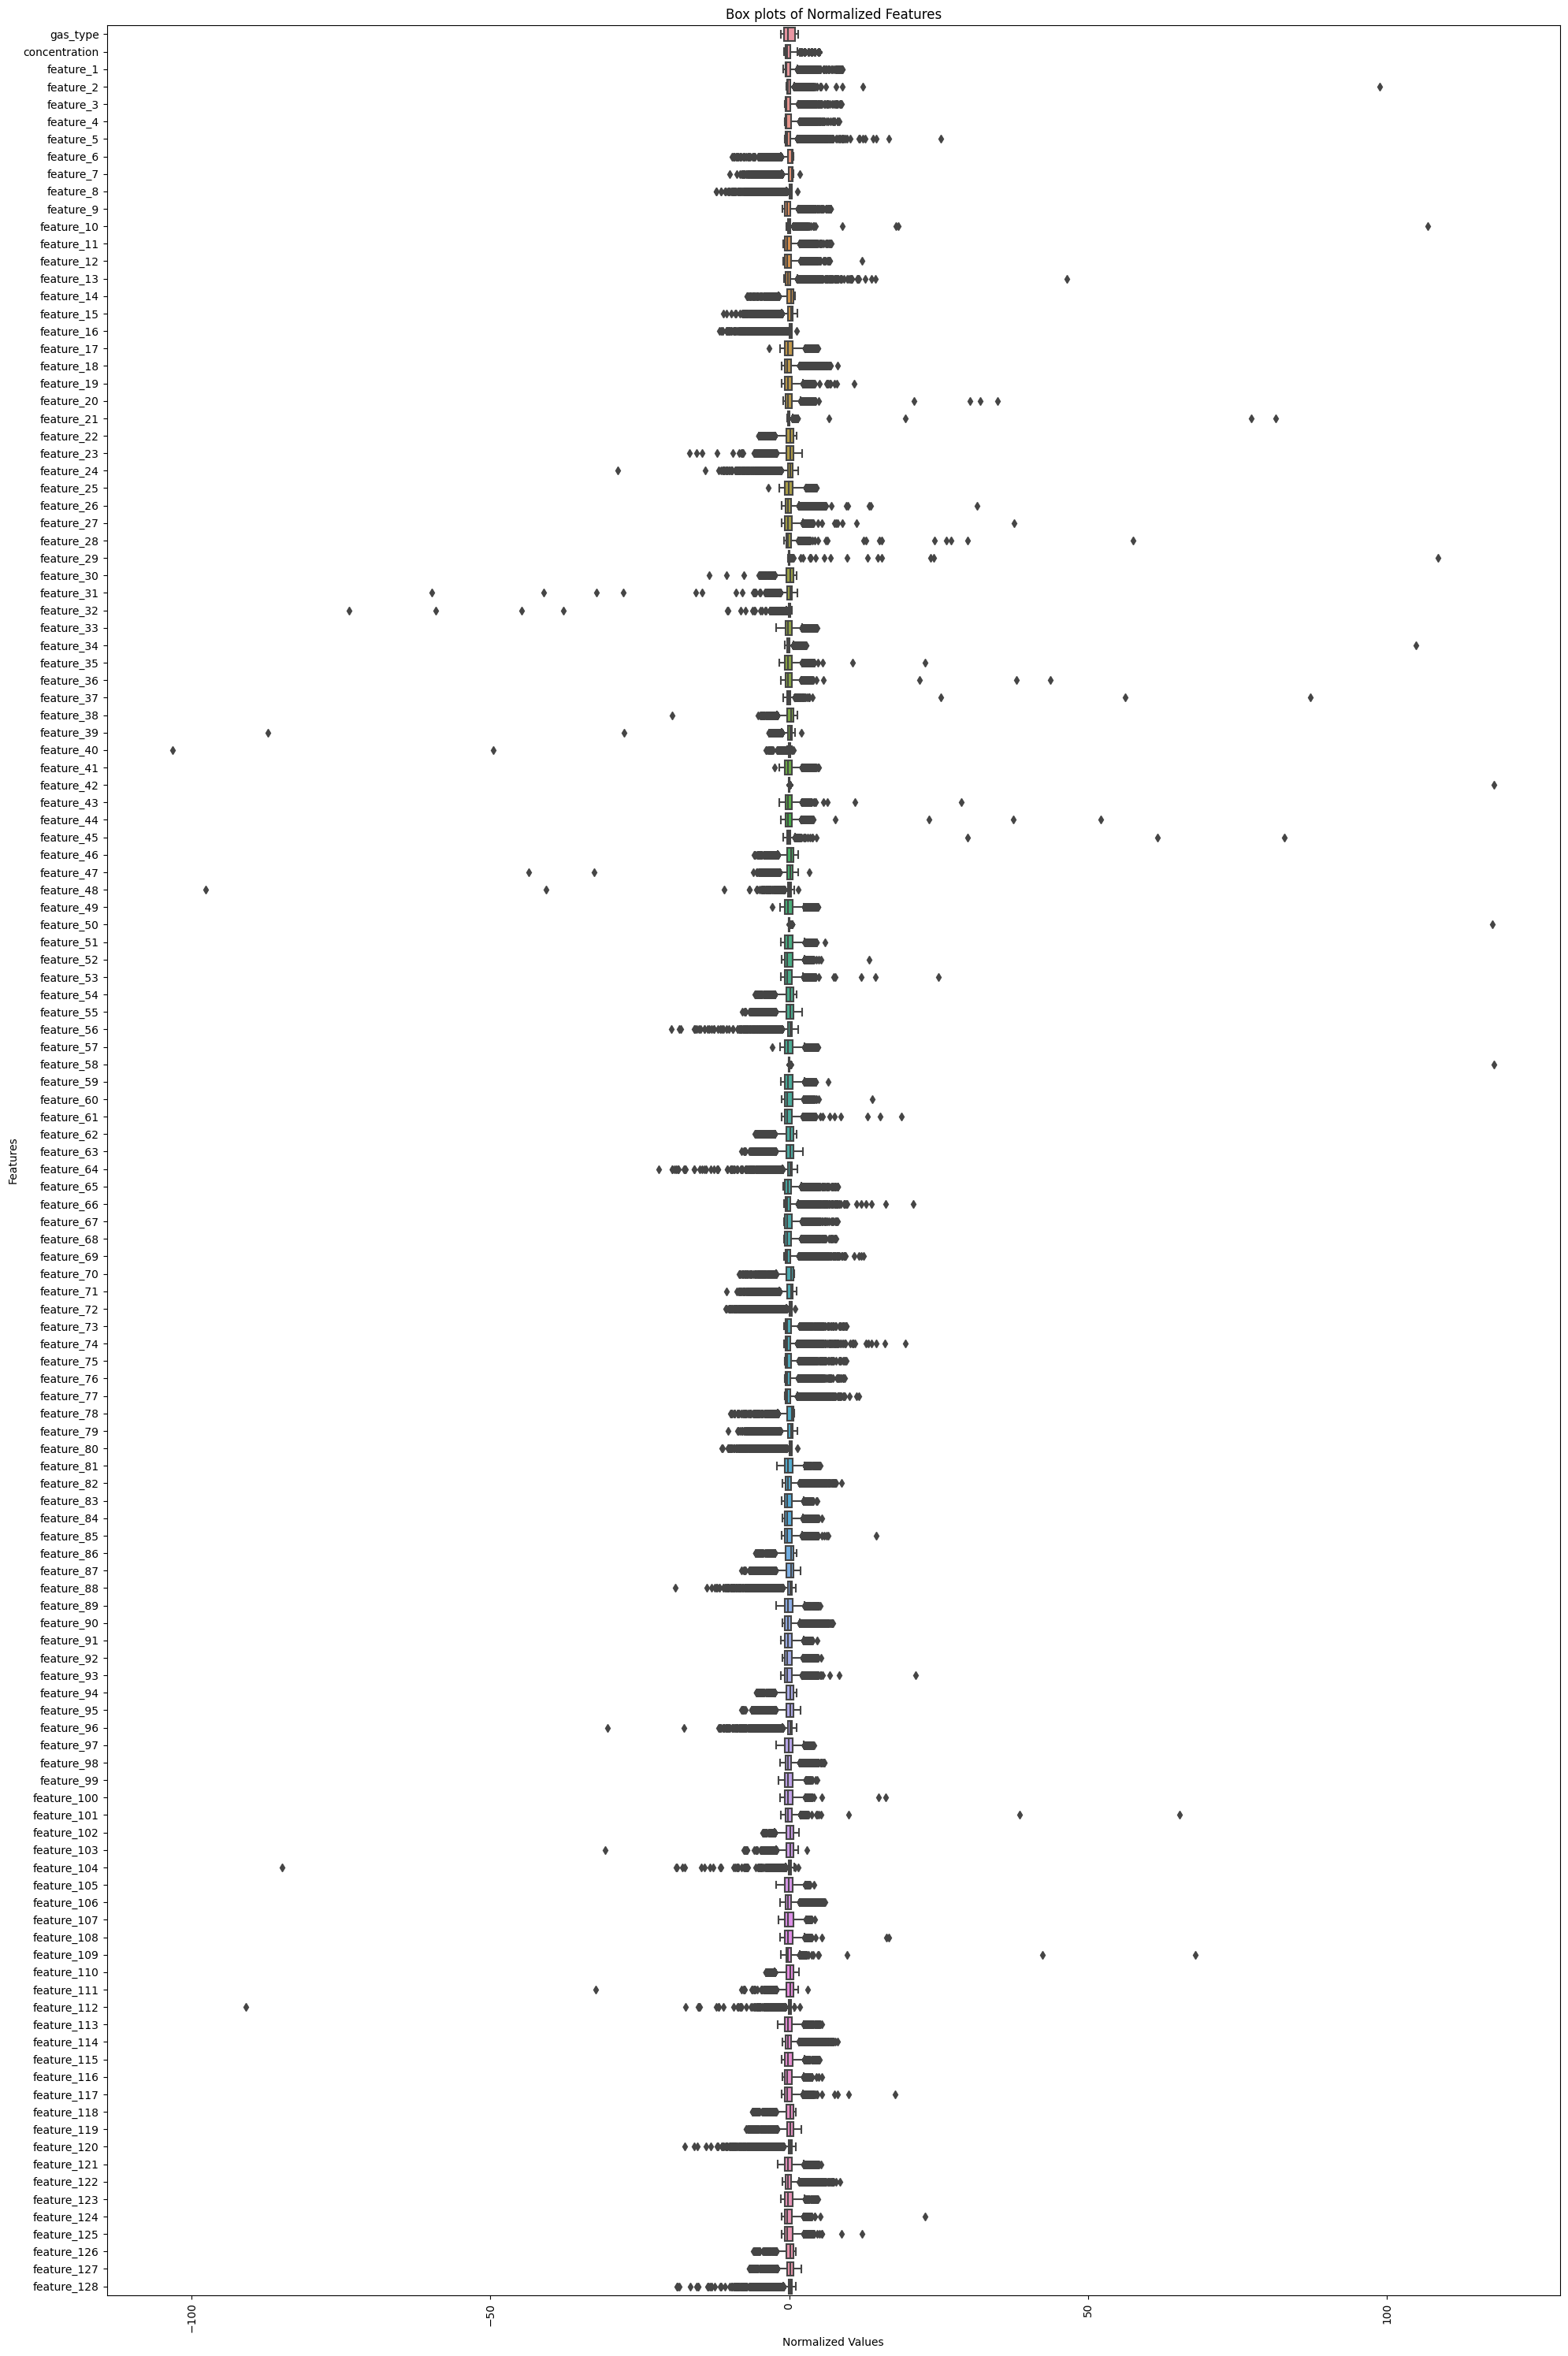

In [30]:
from sklearn.preprocessing import StandardScaler

# Read and Transform All Data into Features
all_features = pd.concat([pd.read_csv(fp, sep=" ", header=None).apply(transform_data_row, axis=1, result_type='expand') for fp in file_paths])

# Normalization of Features
scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(all_features), columns=all_features.columns)

# Prepare the Chart to Display All Box Plots
plt.figure(figsize=(20, 30))  # Adjust the Size According to the Number of Features

# Generate All Box Plots on the Same Chart
sns.boxplot(data=scaled_features, orient='h')
plt.xticks(rotation=90)  # Rotate Labels to Make Them Readable
plt.title("Box plots of Normalized Features")
plt.xlabel("Normalized Values")
plt.ylabel("Features")
plt.tight_layout()  # Automatically Adjust the Subplot to Fit Within the Plot Area
plt.show()

**Presence of Outliers**:

* The isolated points that are far from the main boxes on the plot indicate outliers. The presence of numerous outliers may suggest that the
sensor readings vary a lot or there might be mistakes in the measurements.

**Comparison Between Features**:

* After normalizing, some features spread out more than others, which can mean some sensors react more strongly or in different ways than others.

**Feature Selection for Modeling**:

* Features with little variability (very short boxes) may have less value for predictive models, while those with a wide distribution might be more useful for making predictions.

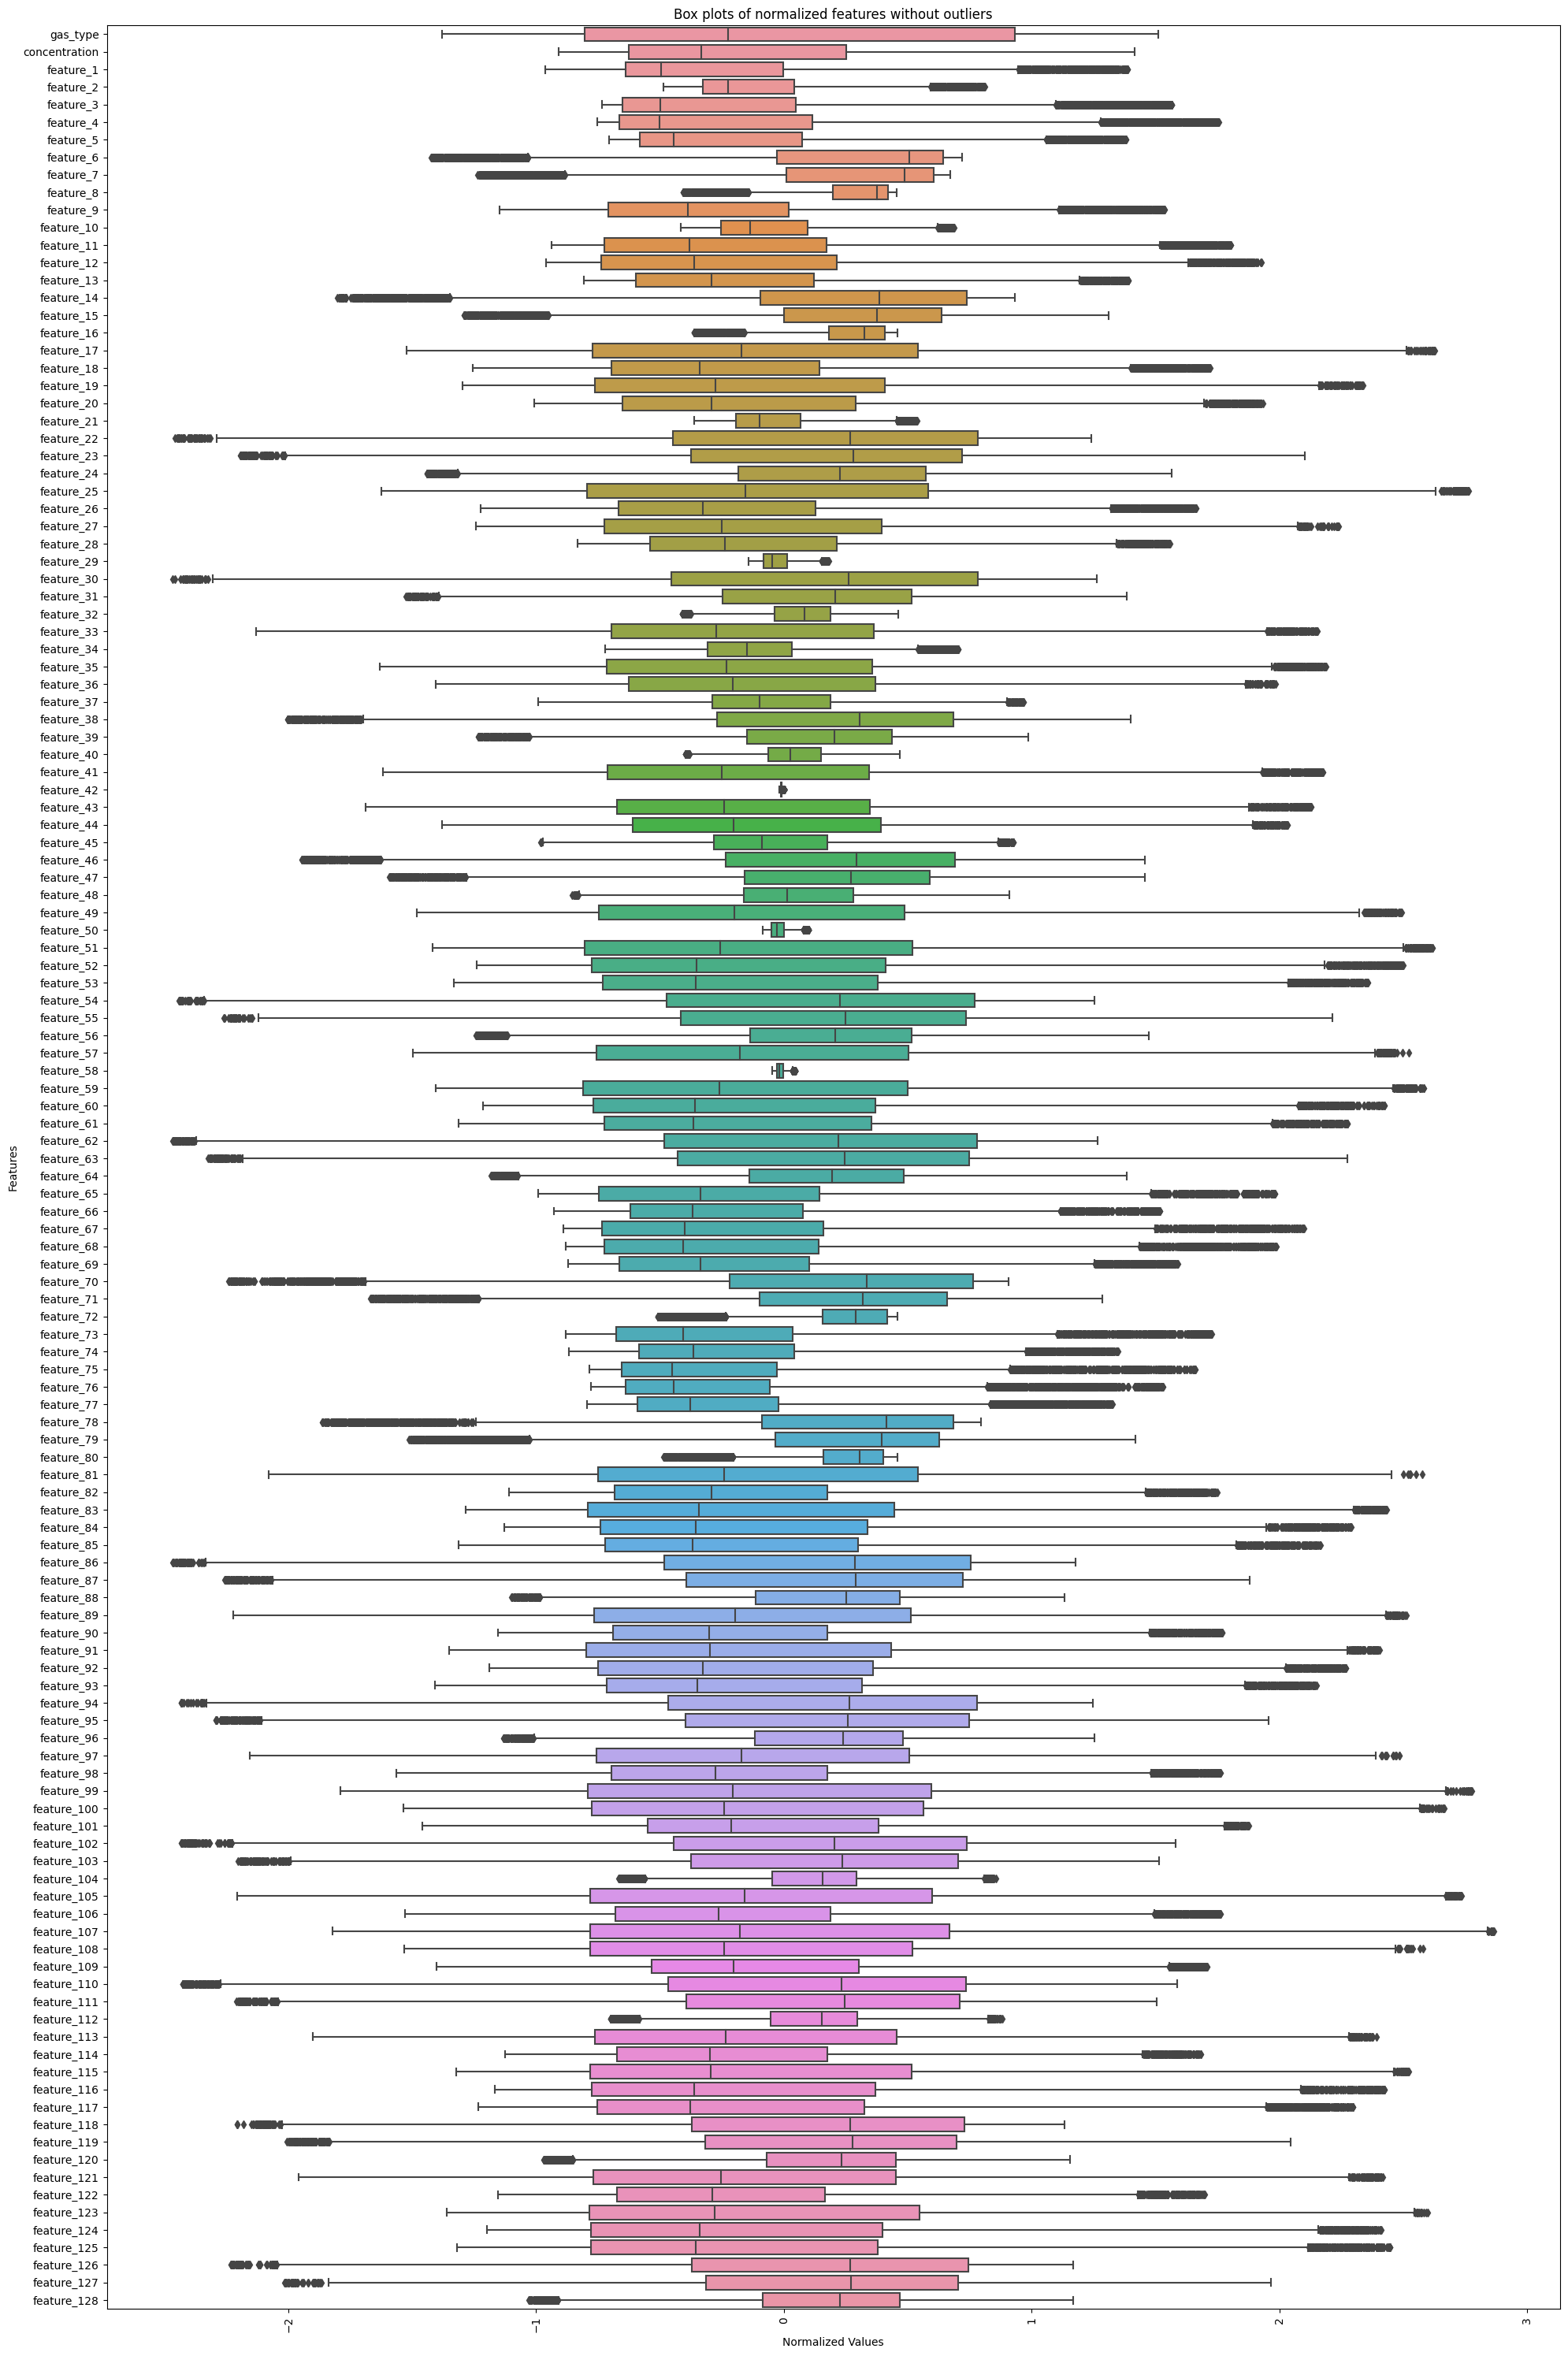

In [31]:
from scipy.stats import iqr

# Function to filter outliers
def filter_outliers(df):
    filtered_df = pd.DataFrame()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        # Set Boundaries for Non-Outlier Values
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter Outlier Values
        filtered_col = df[col][(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        filtered_df = pd.concat([filtered_df, filtered_col], axis=1)
    return filtered_df

# Apply the Filter to the DataFrame
filtered_features = filter_outliers(scaled_features)

# Prepare the Chart to Display All Box Plots
plt.figure(figsize=(20, 30))  # Adjust the Size According to the Number of Features

# Generate All Box Plots on the Same Chart
sns.boxplot(data=filtered_features, orient='h')
plt.xticks(rotation=90)  # Rotate Labels to Make Them Readable
plt.title("Box plots of normalized features without outliers")
plt.xlabel("Normalized Values")
plt.ylabel("Features")
plt.tight_layout()  # Automatically Adjust the Subplot to Fit Within the Plot Area
plt.show()

In [32]:
# Features with little variance
all_features[['feature_42', 'feature_50', 'feature_58']].describe()

feature_42    feature_50    feature_58
count  13910.000000  13910.000000  13910.000000
mean       5.236010      6.504471      7.080892
std      264.223389     69.850957    137.731994
min        0.645011      0.538273      0.539480
25%        2.099050      3.066598      3.056948
50%        2.608878      4.811772      4.807393
75%        3.320060      7.213082      7.193543
max    31165.169585   8228.716063  16242.347449

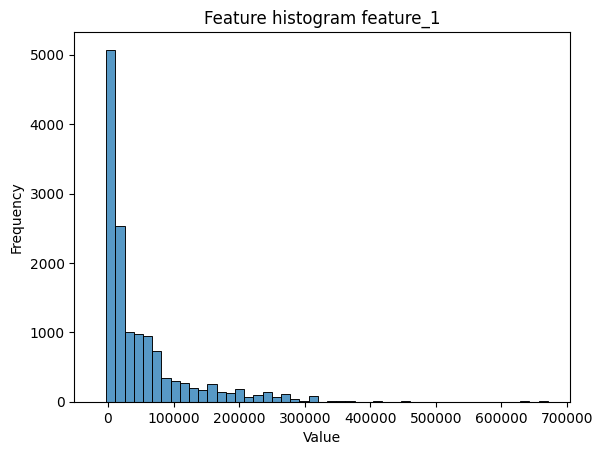

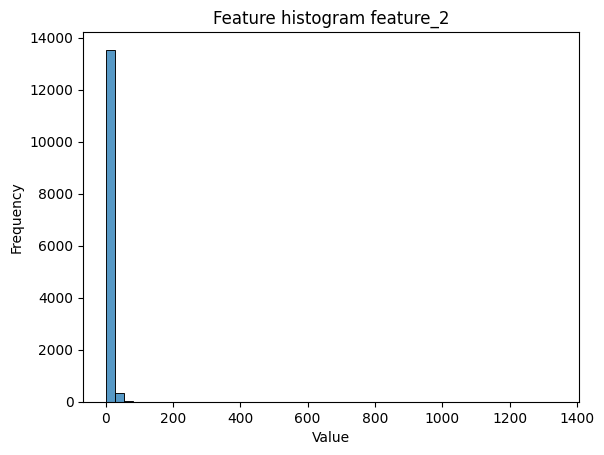

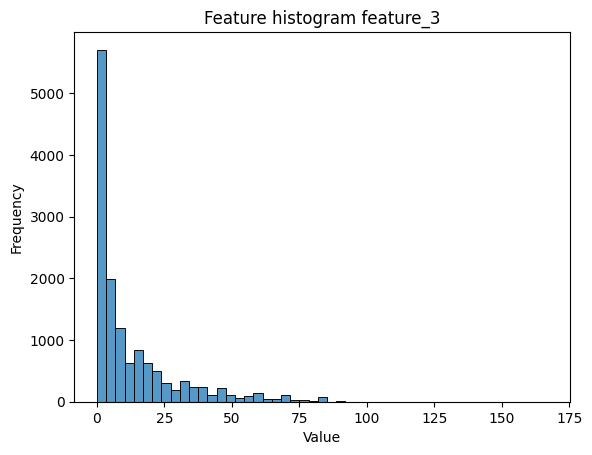

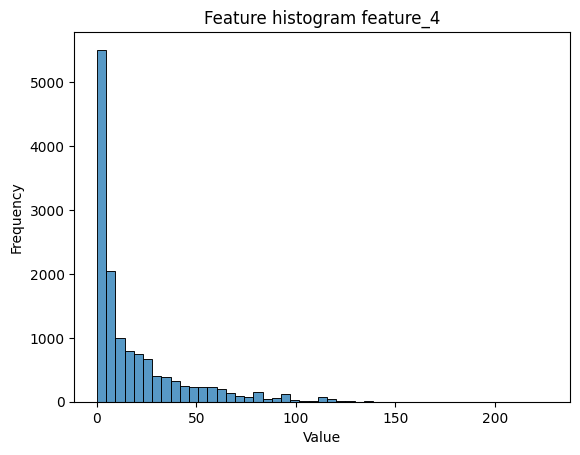

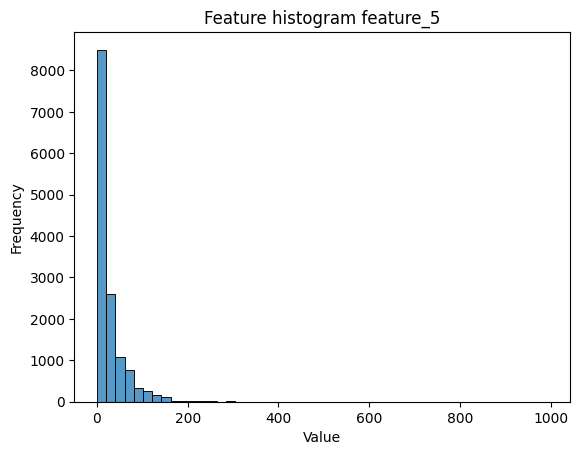

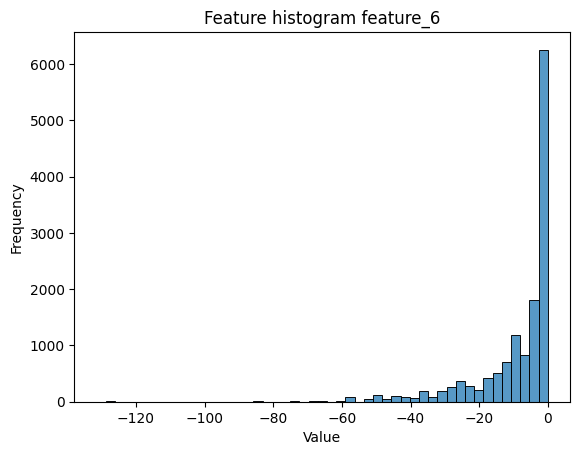

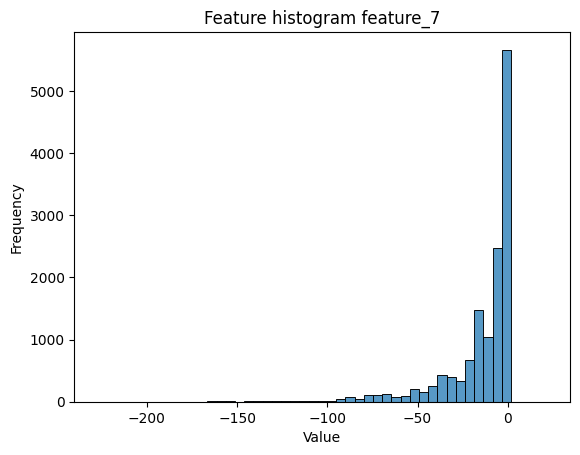

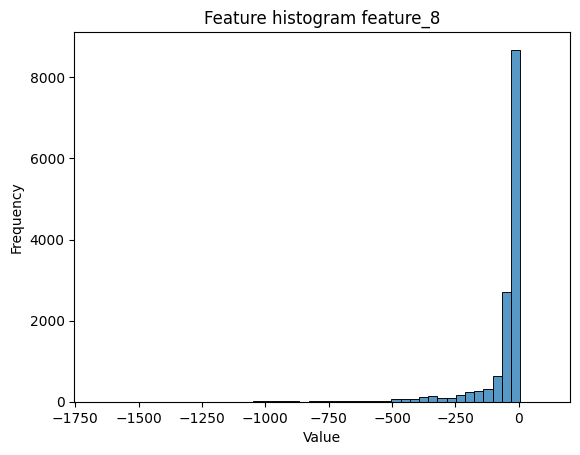

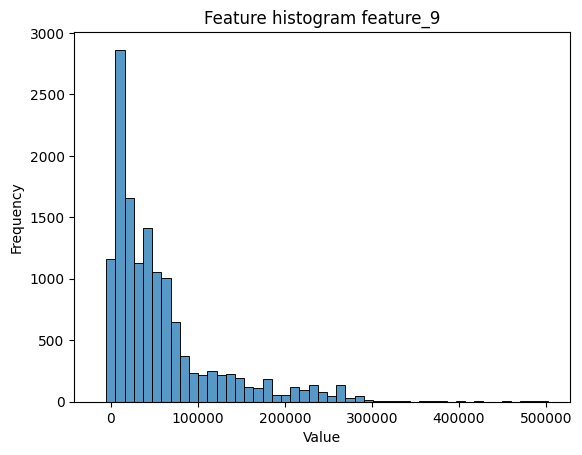

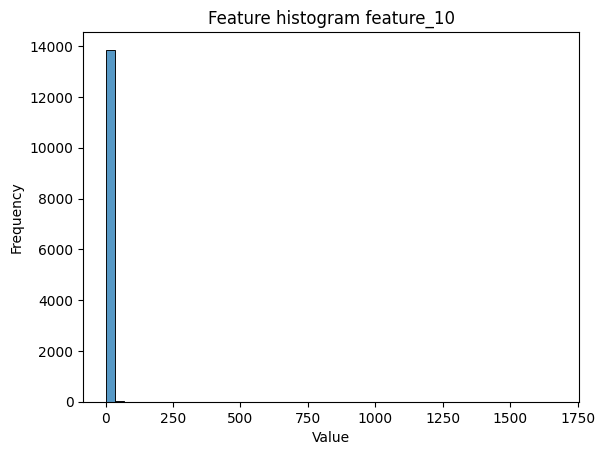

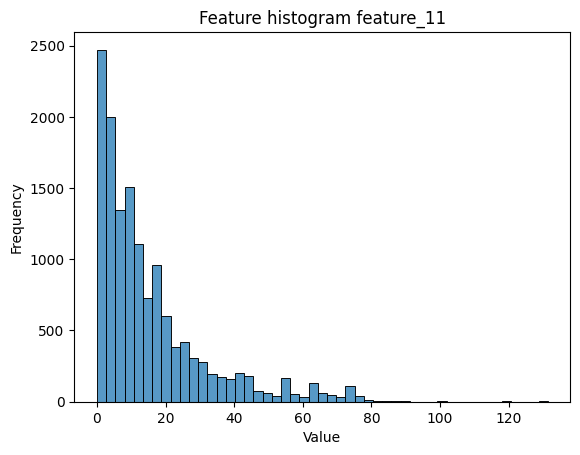

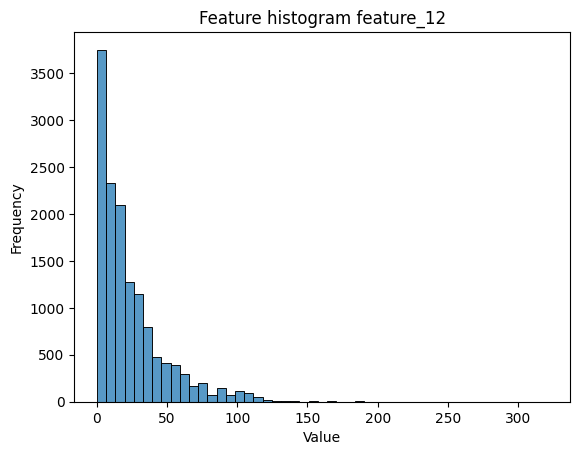

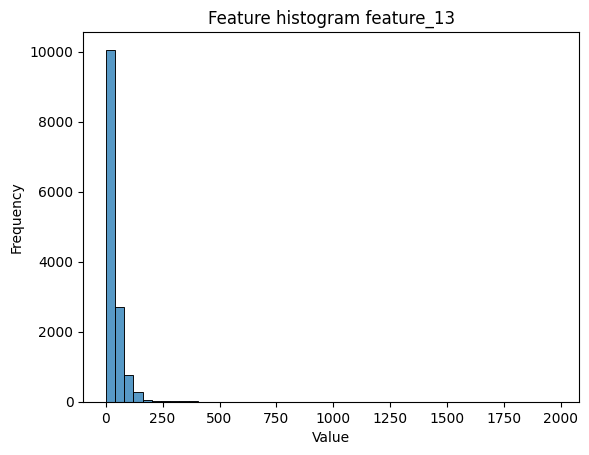

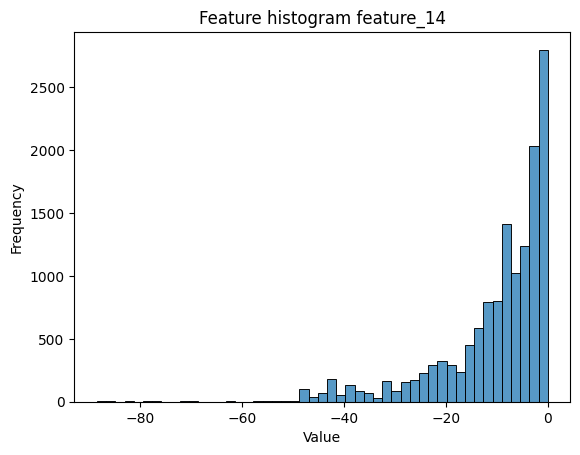

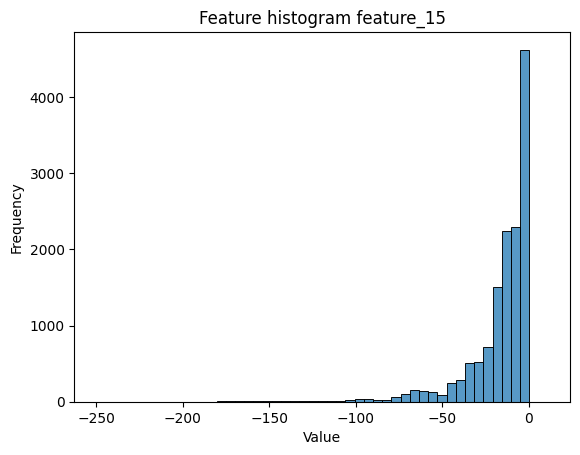

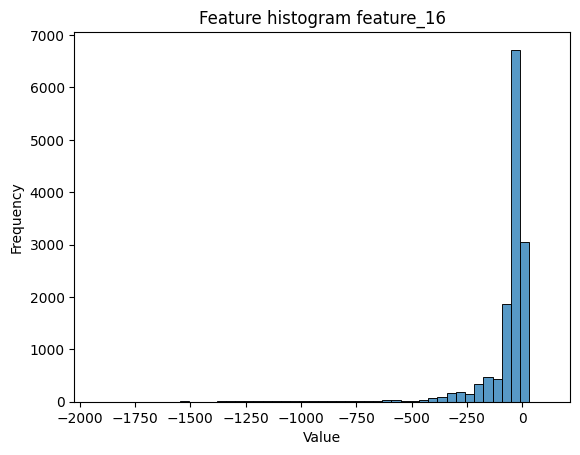

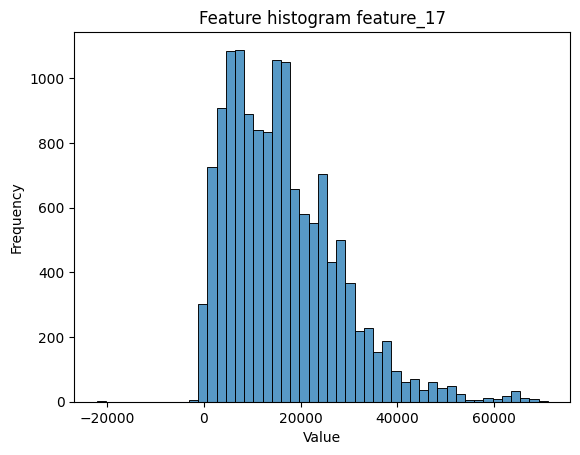

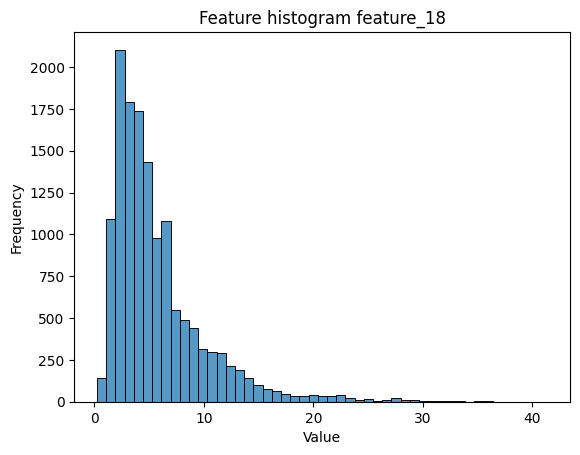

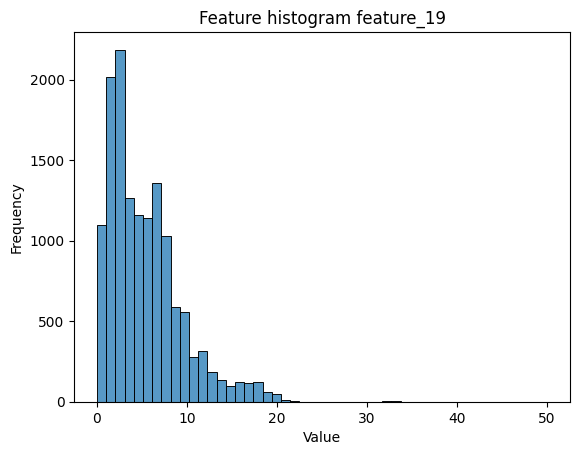

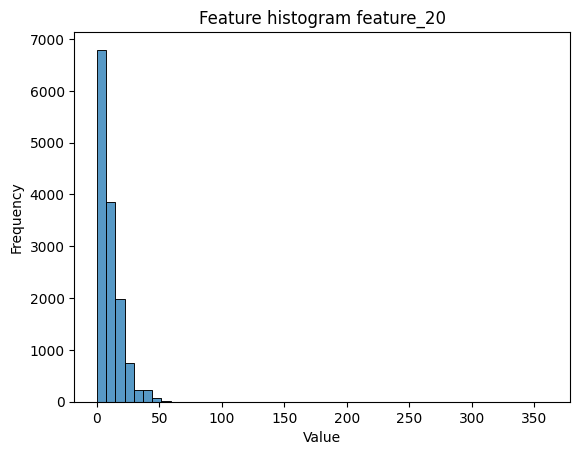

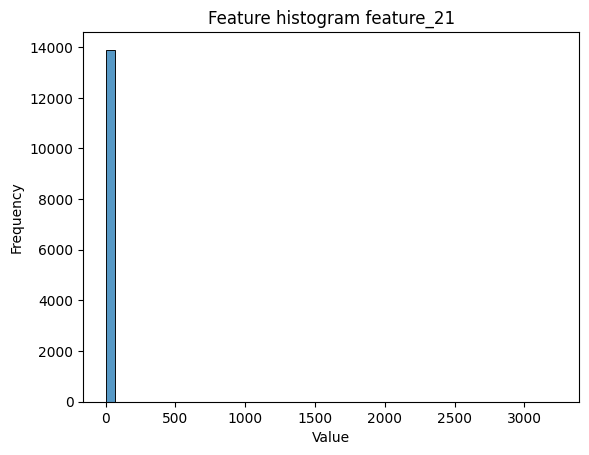

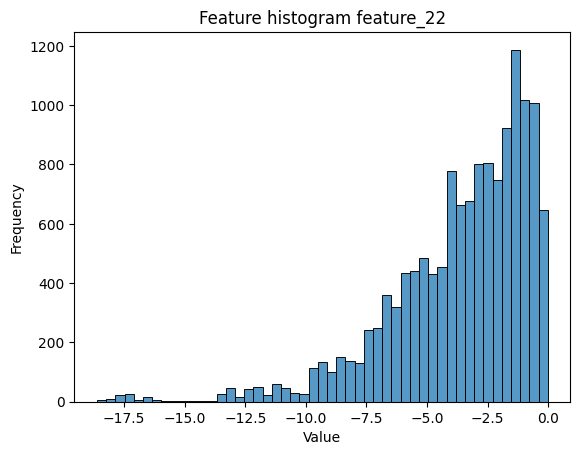

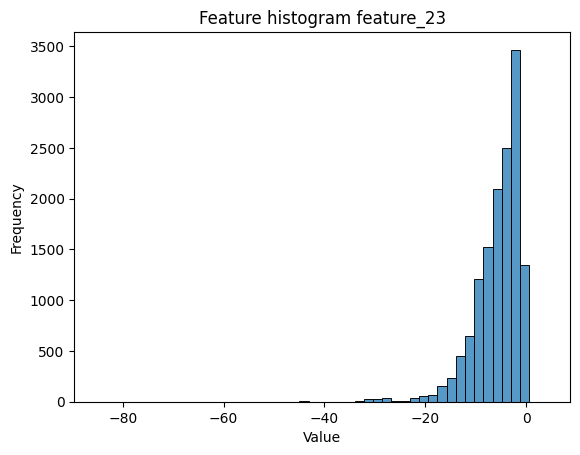

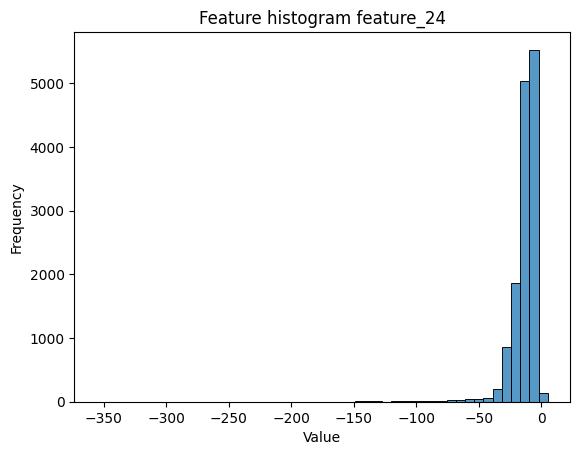

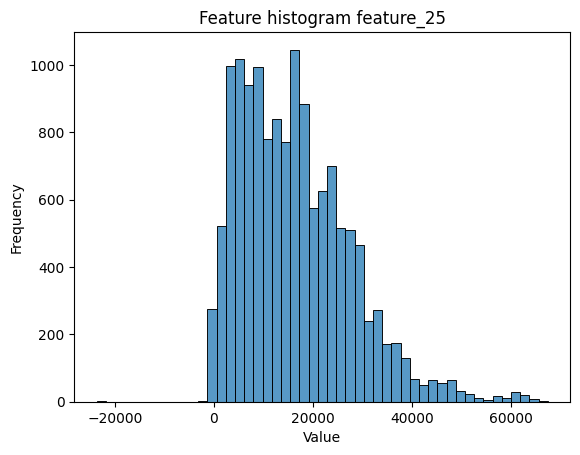

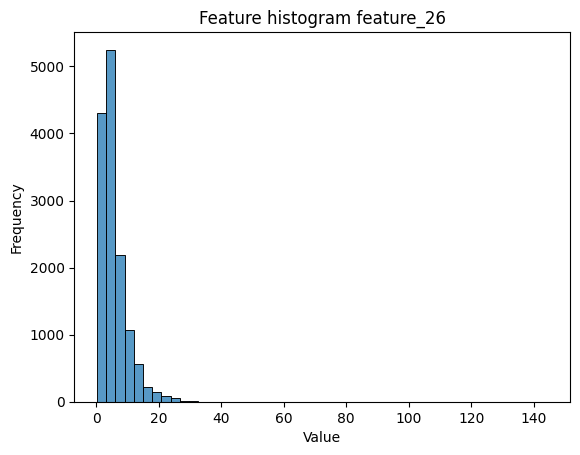

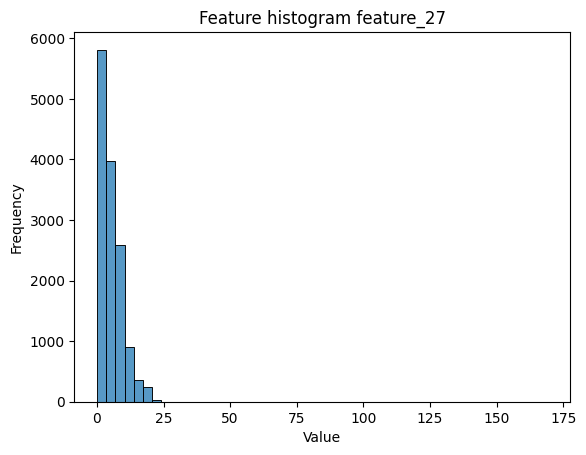

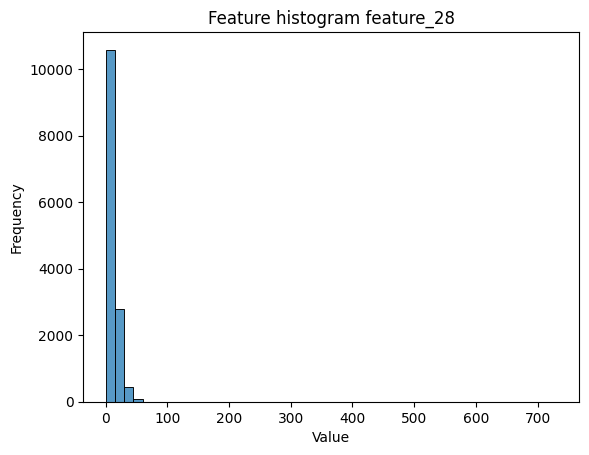

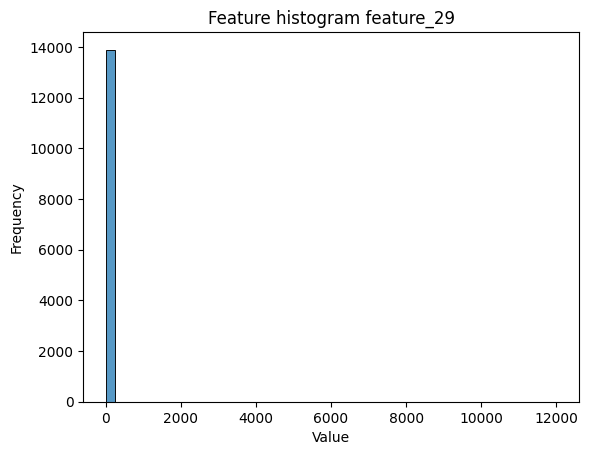

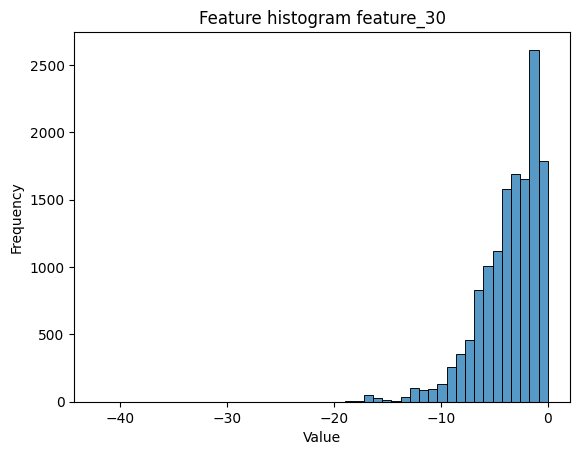

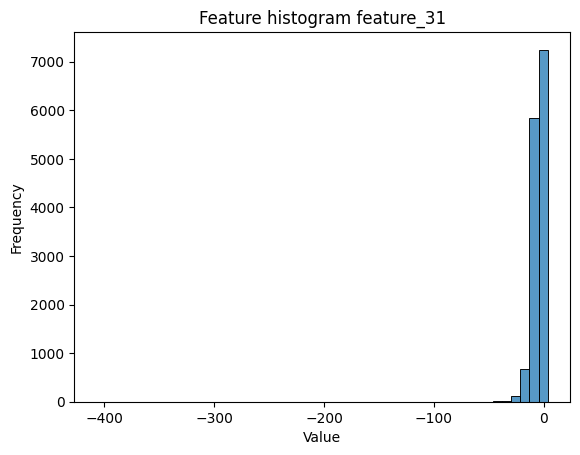

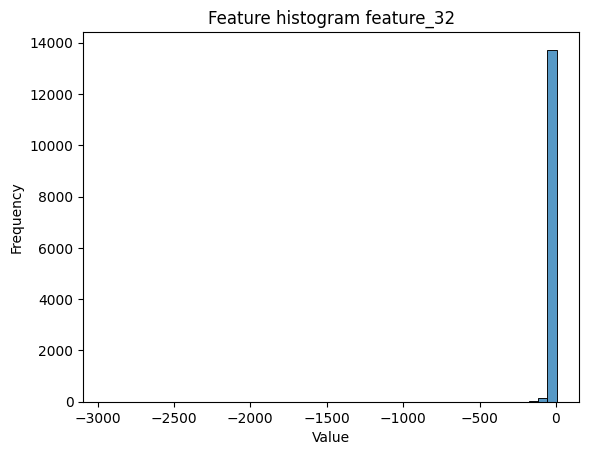

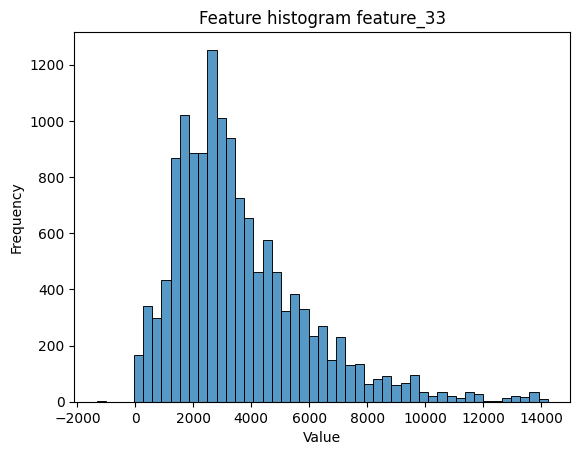

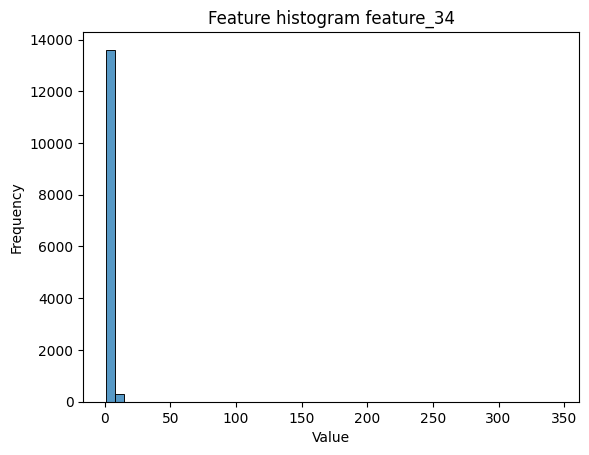

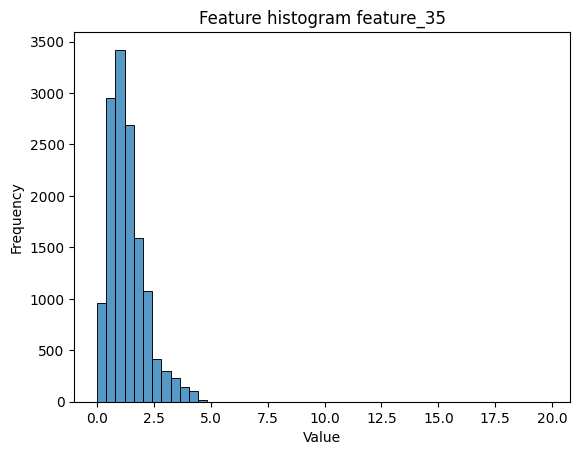

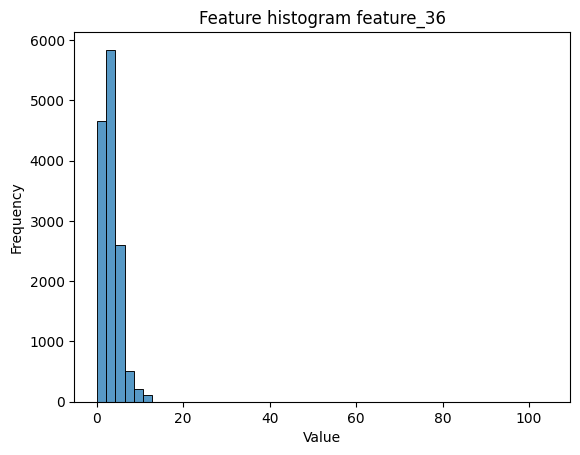

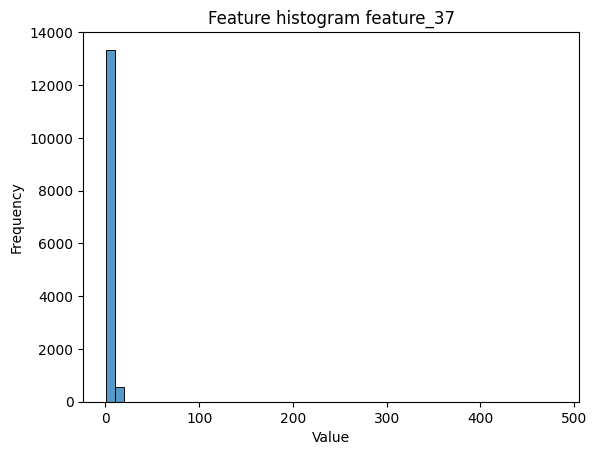

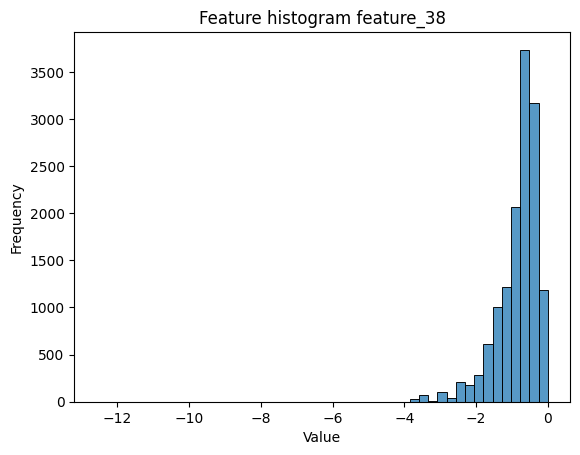

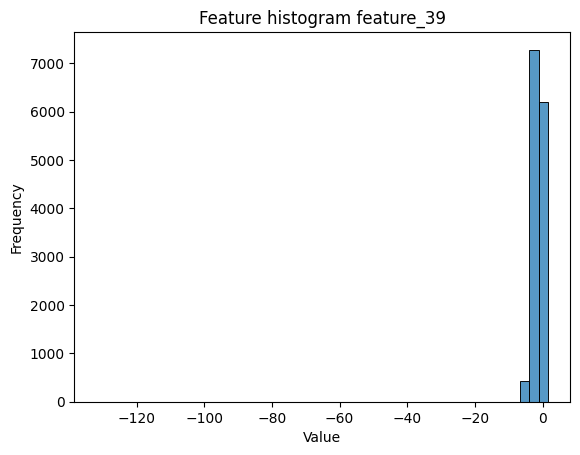

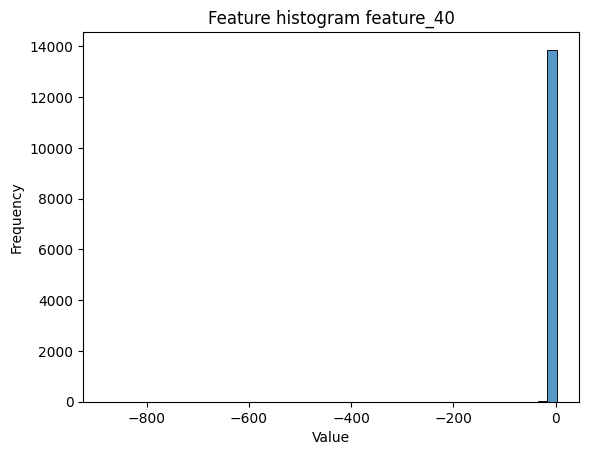

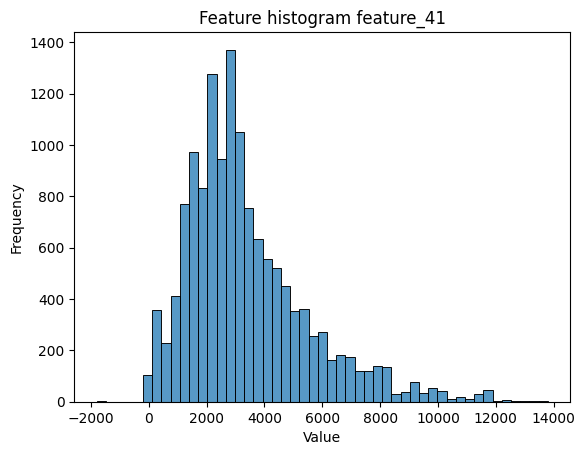

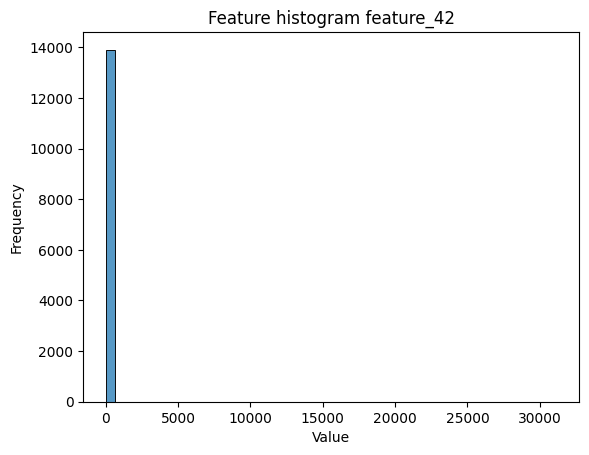

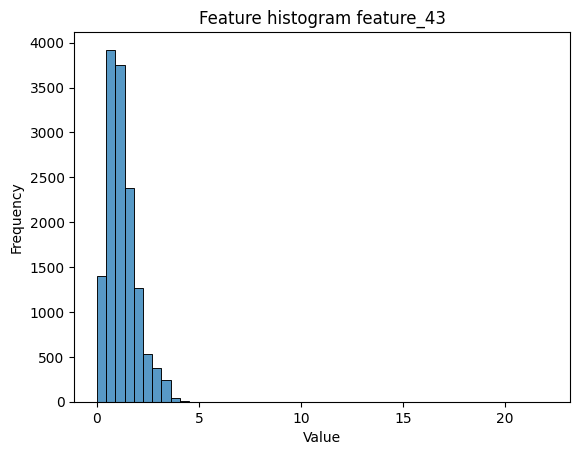

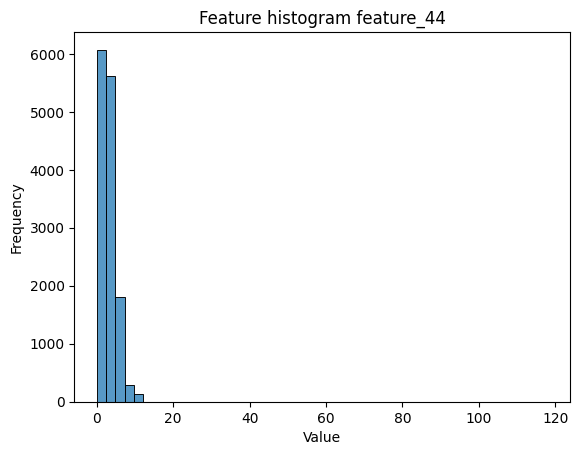

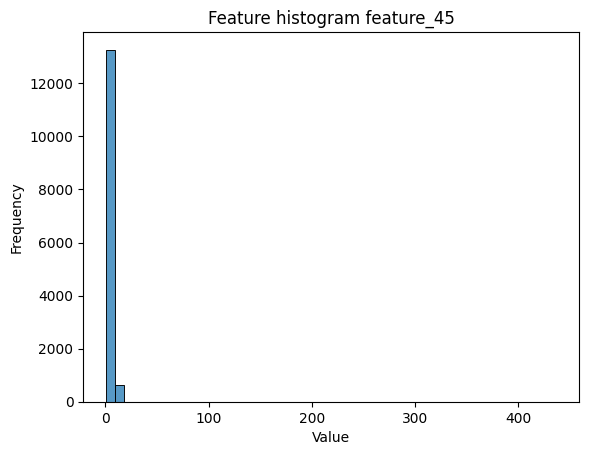

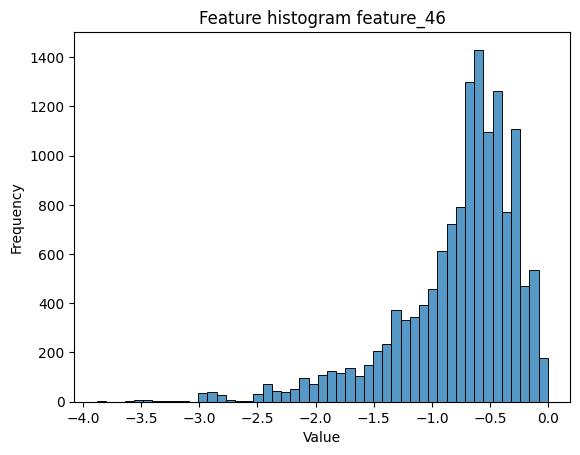

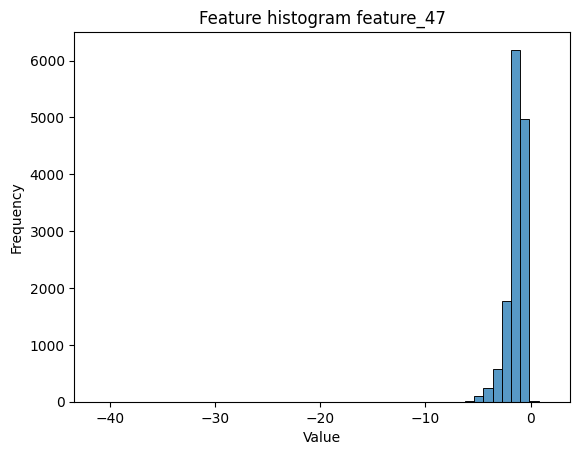

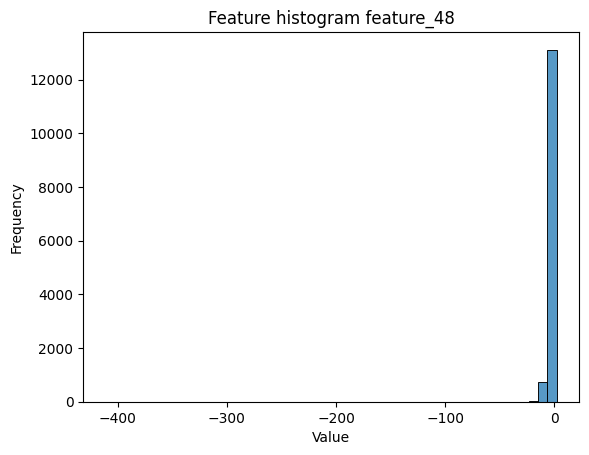

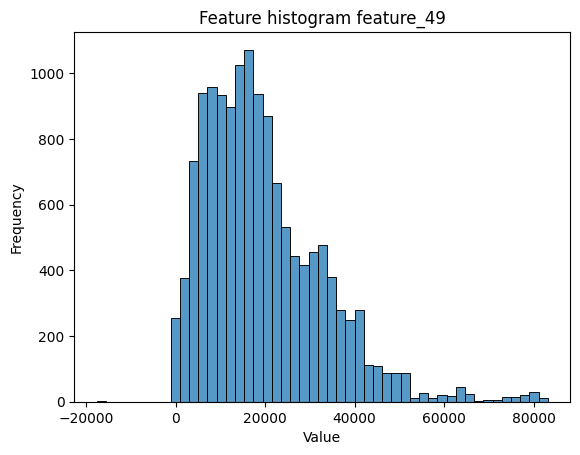

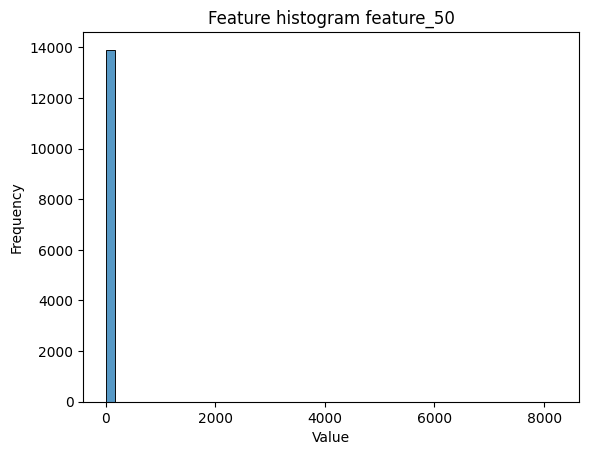

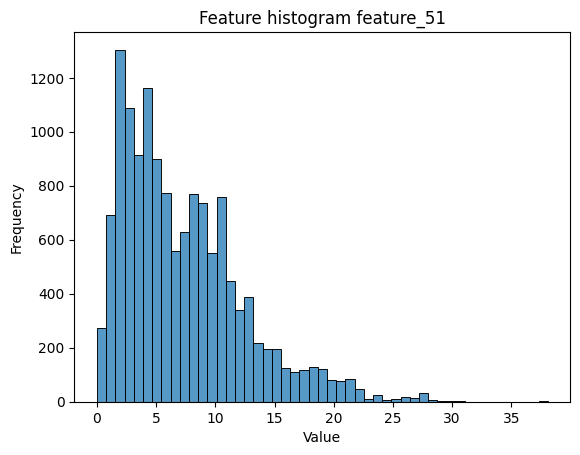

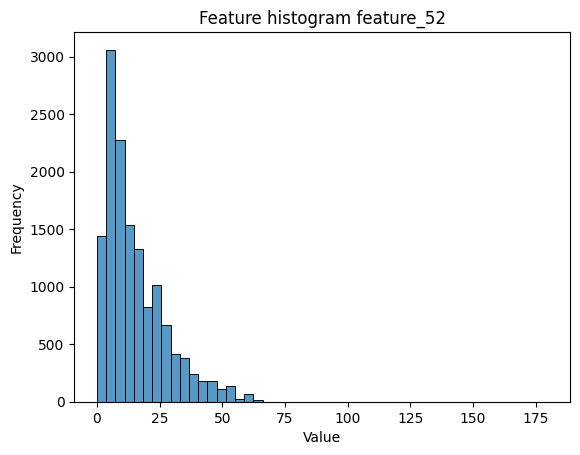

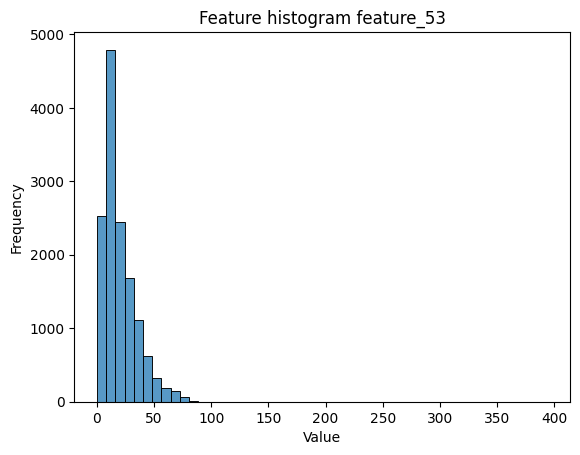

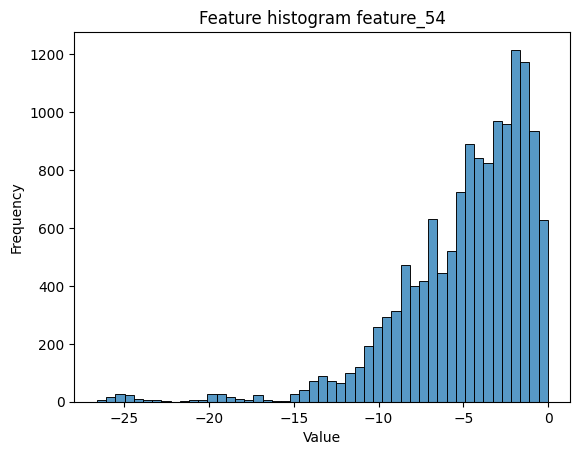

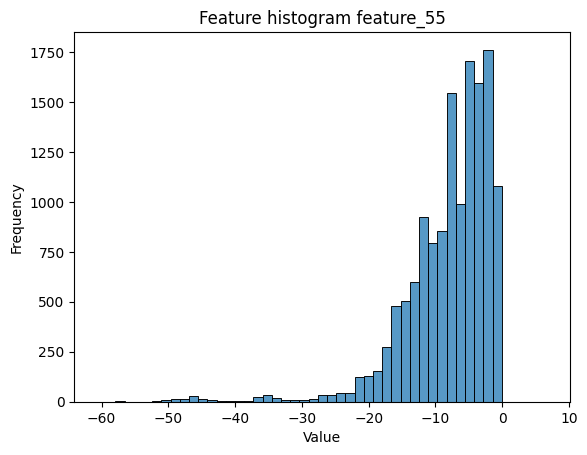

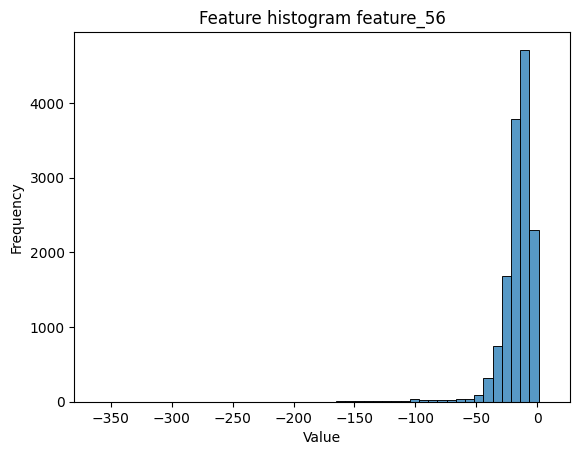

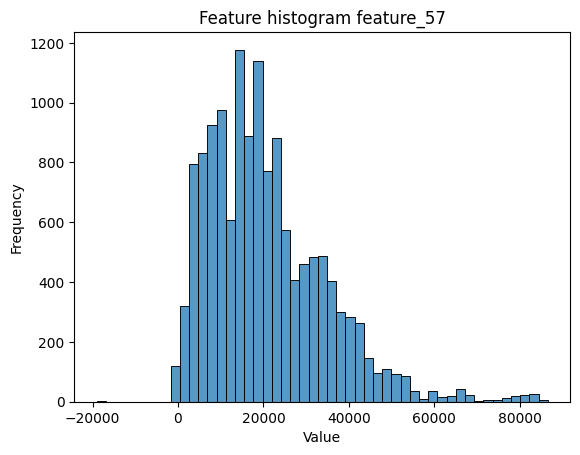

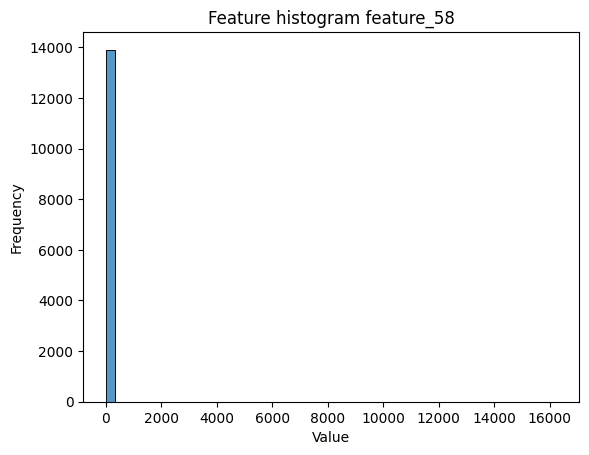

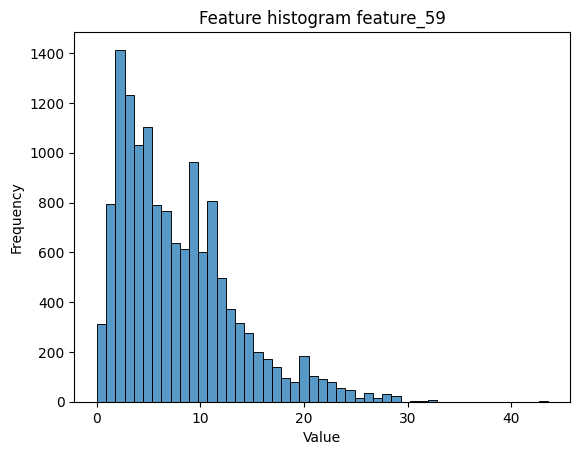

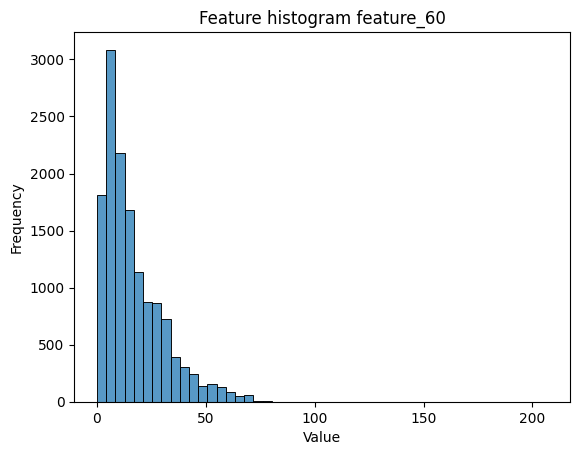

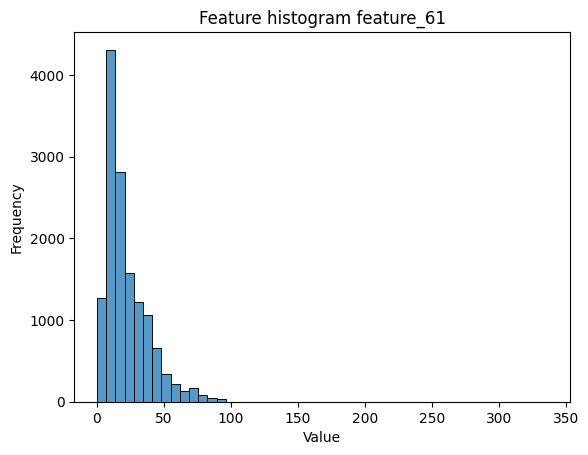

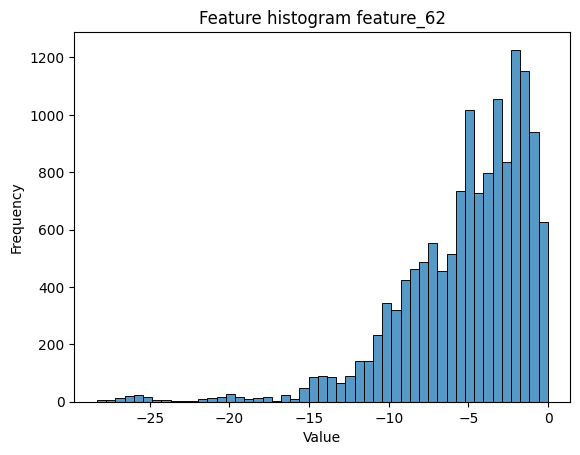

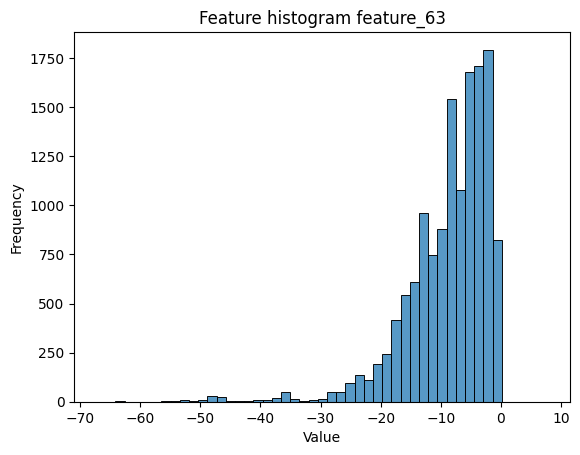

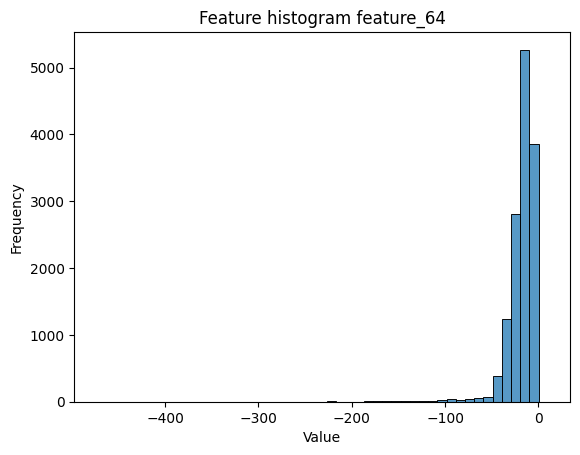

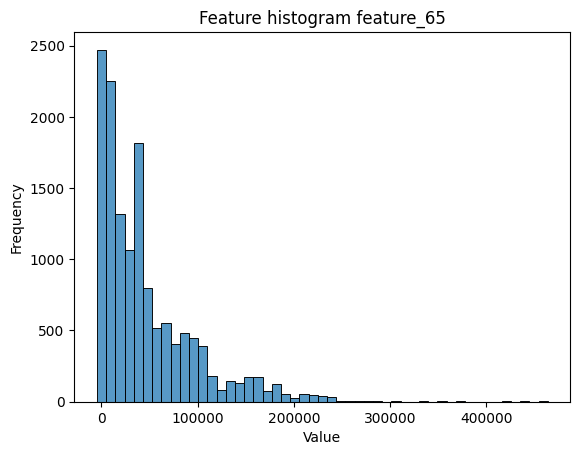

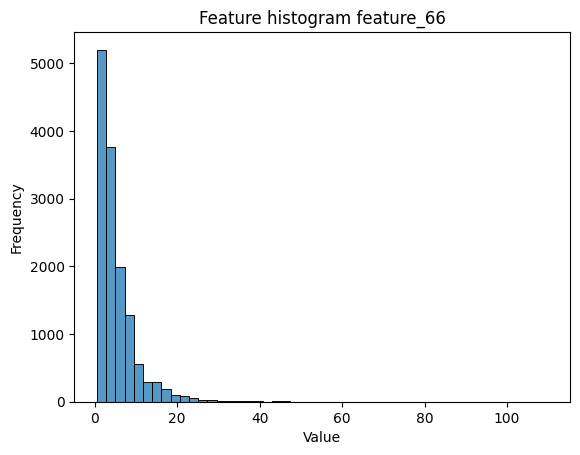

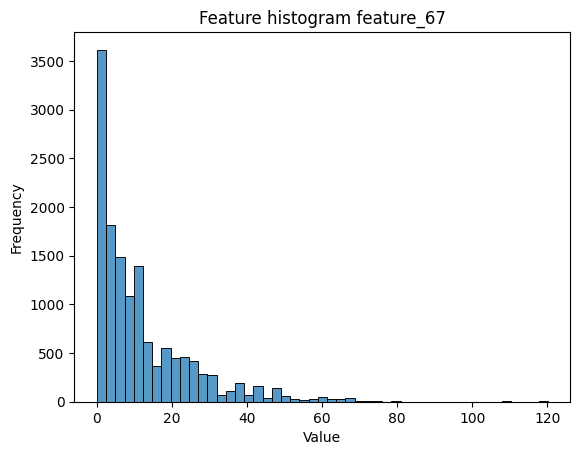

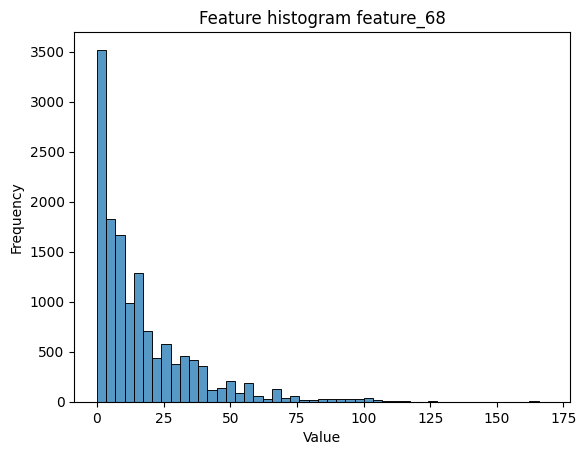

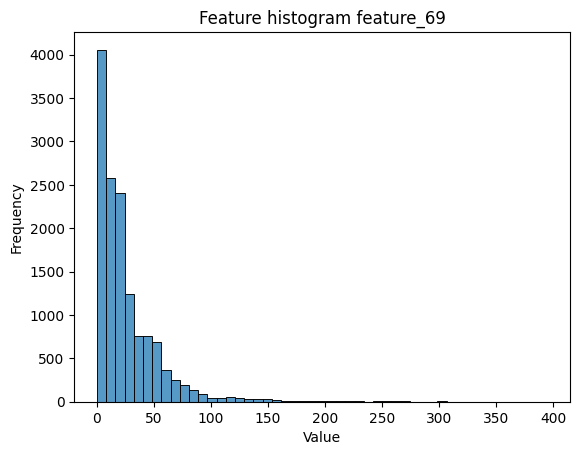

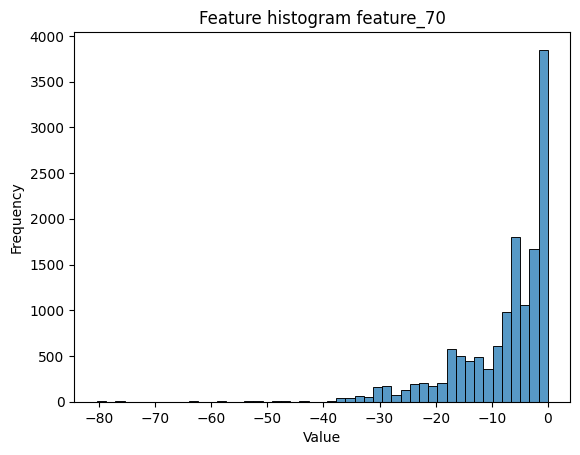

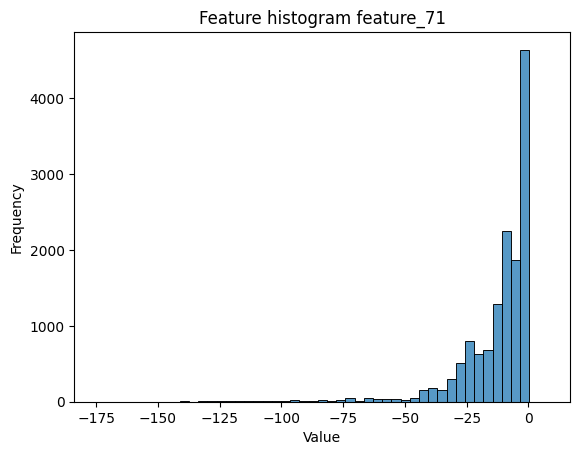

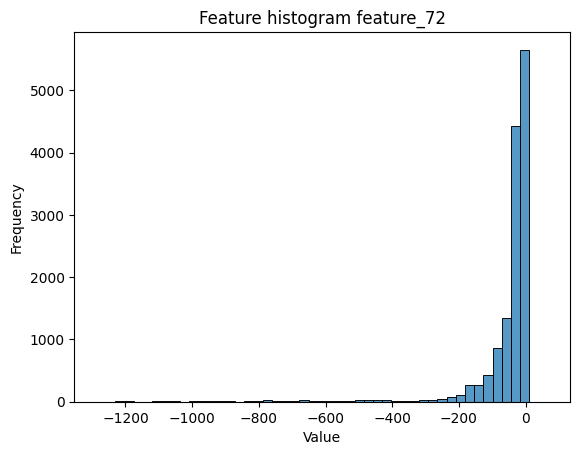

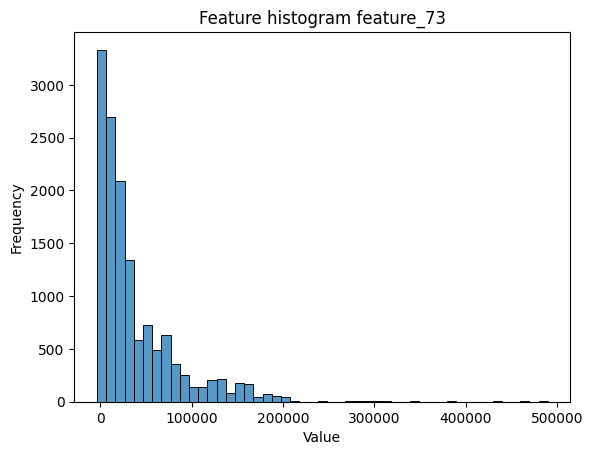

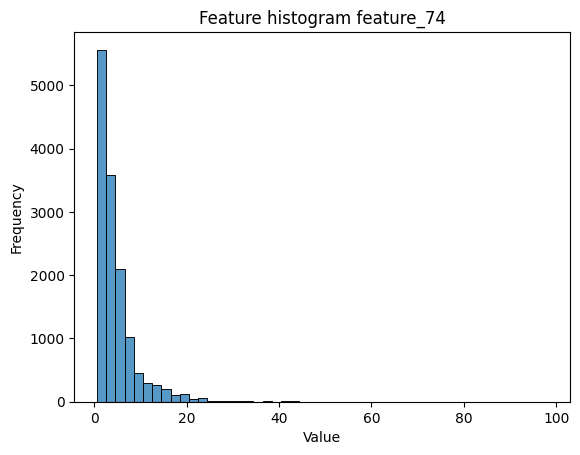

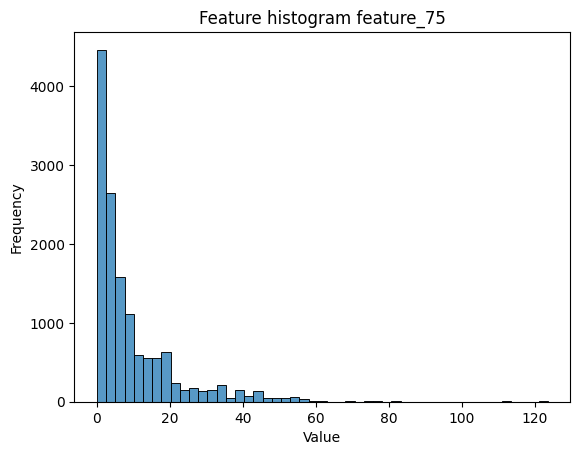

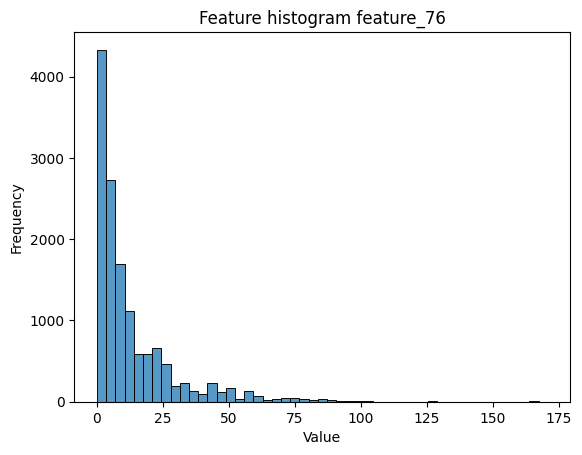

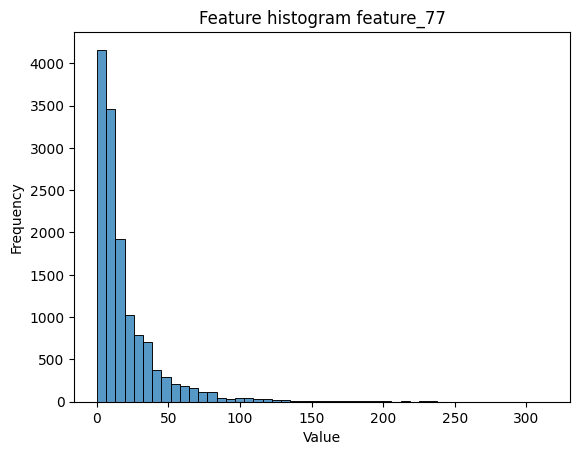

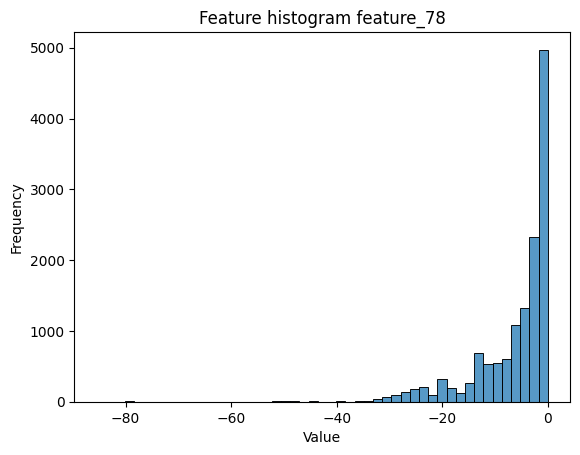

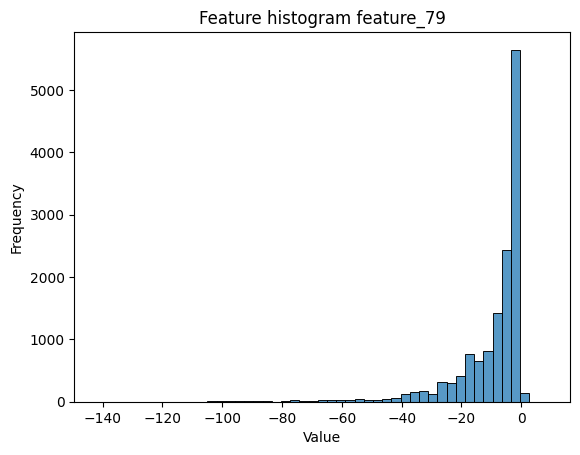

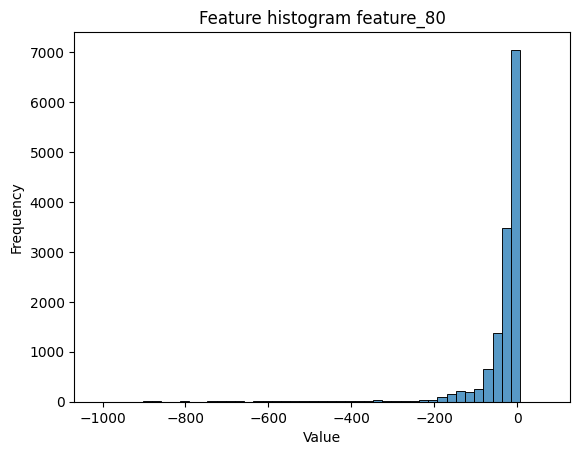

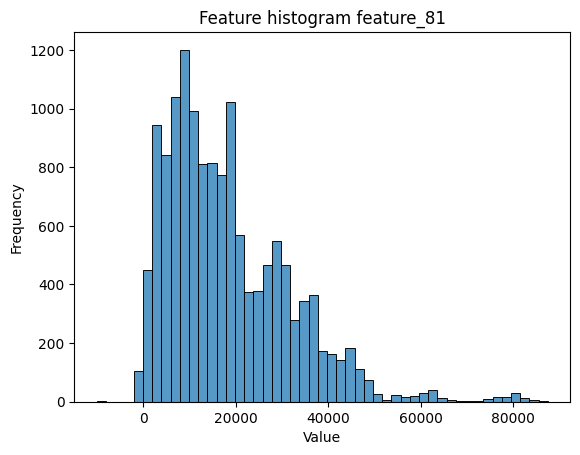

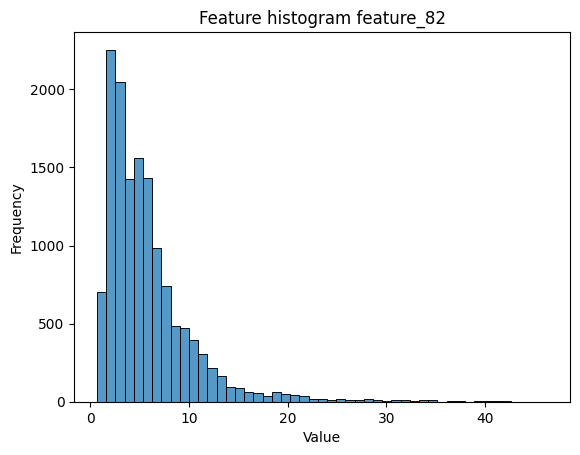

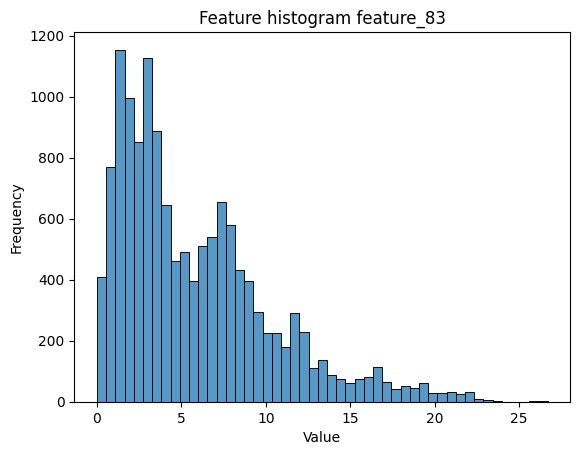

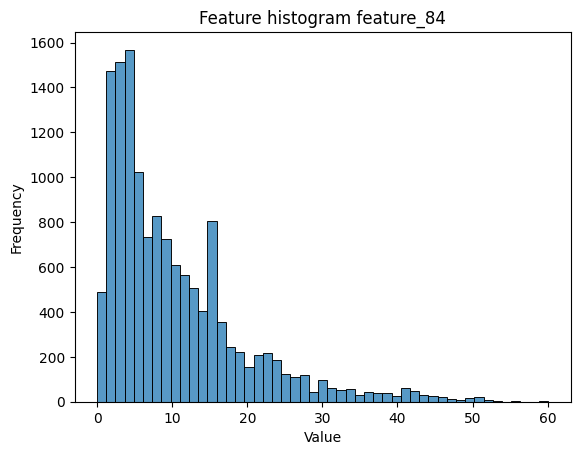

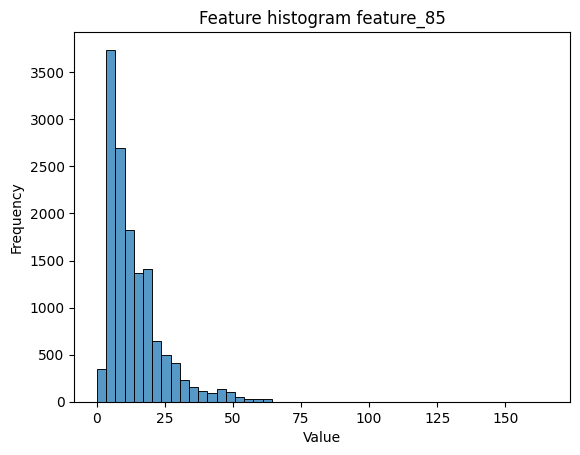

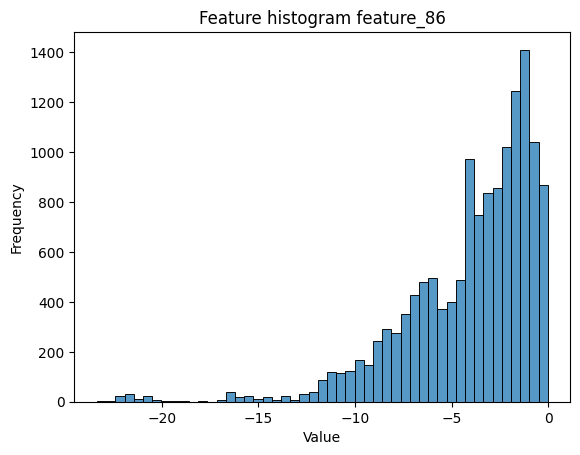

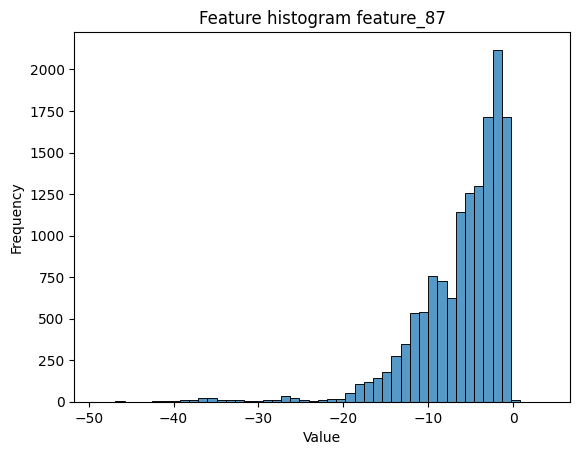

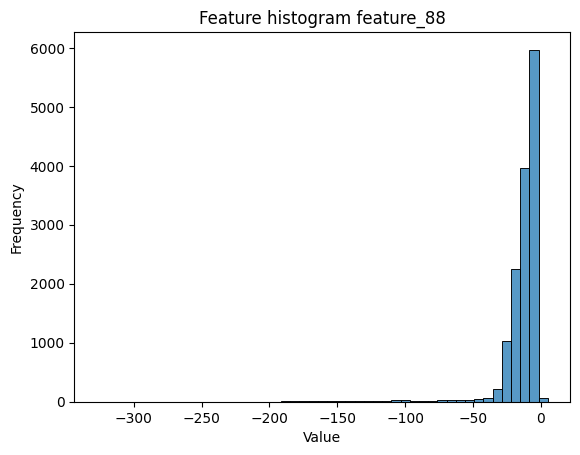

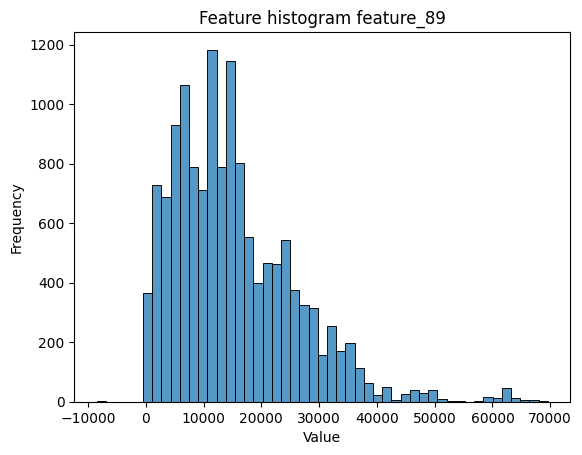

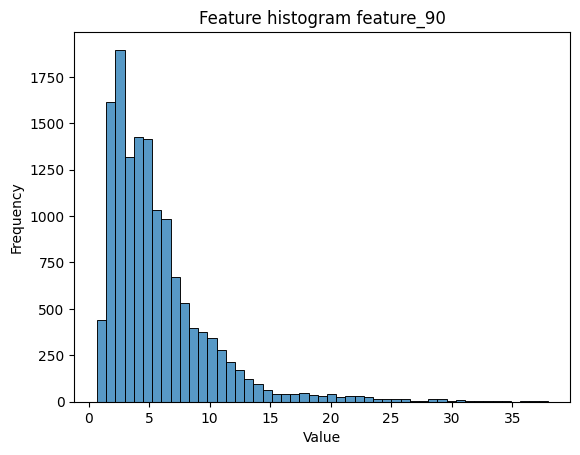

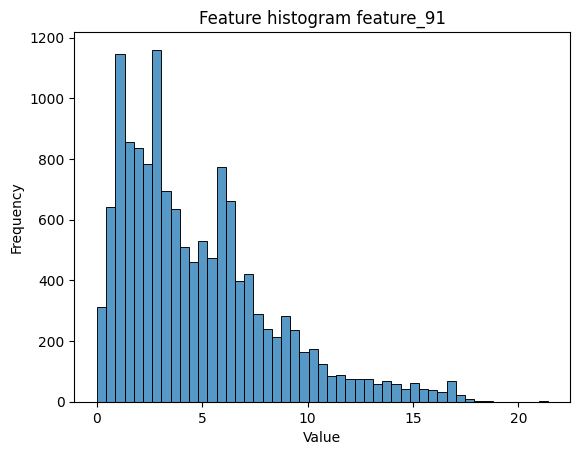

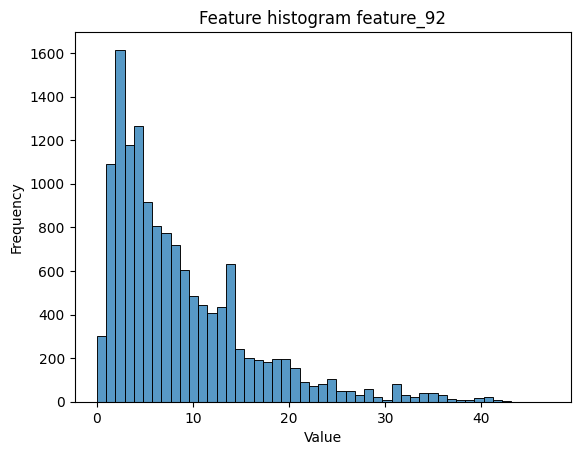

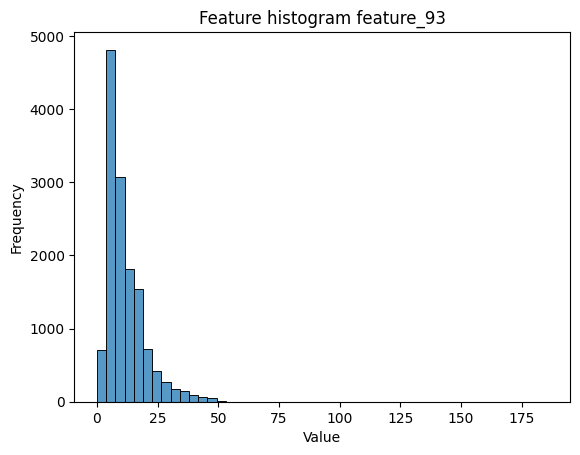

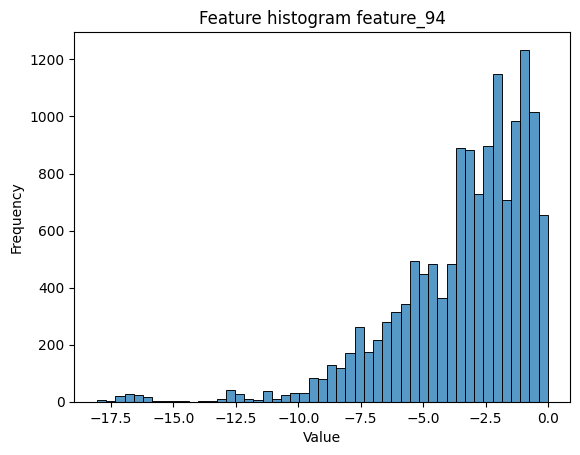

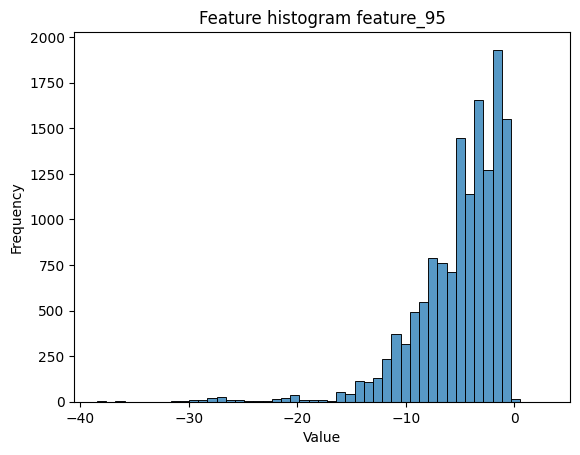

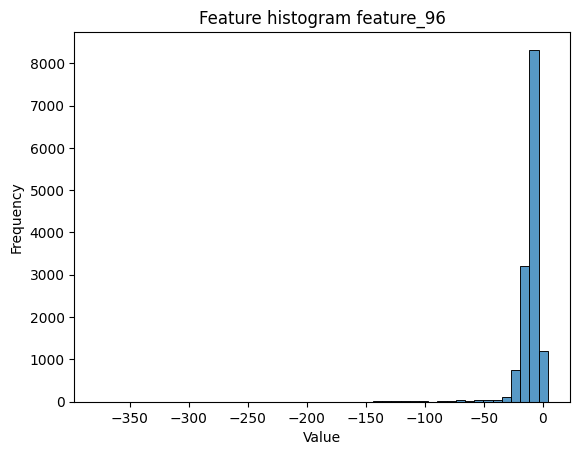

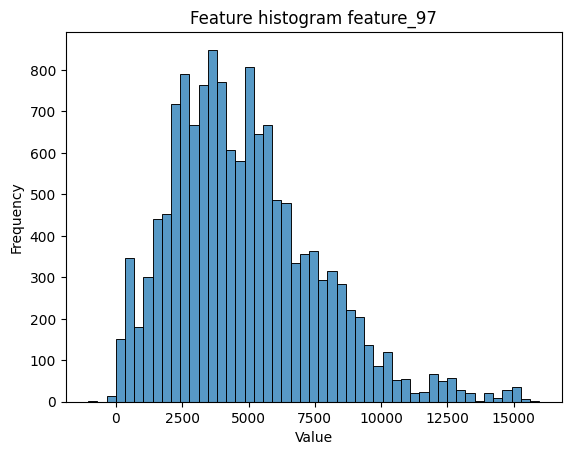

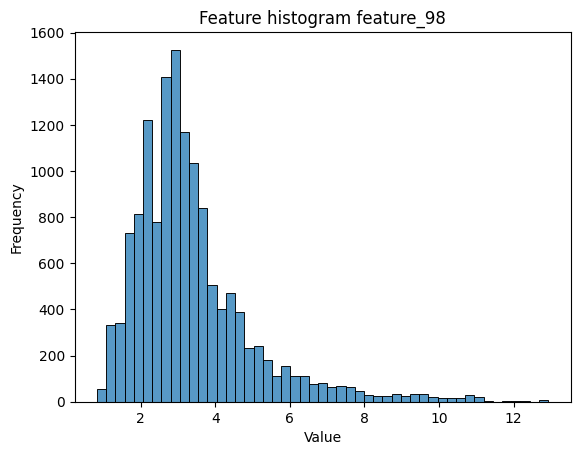

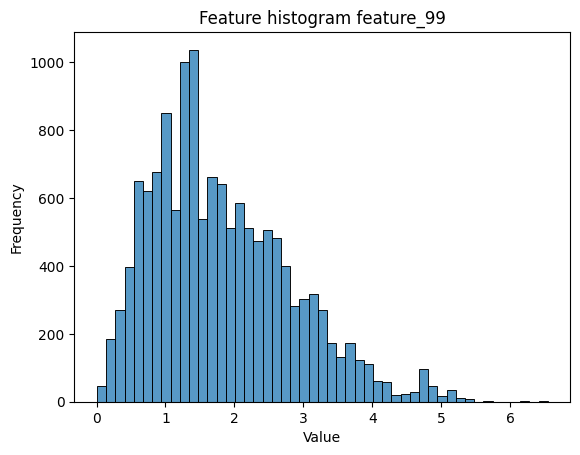

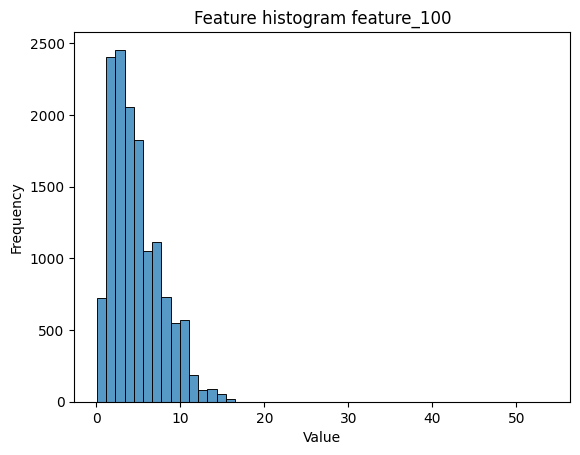

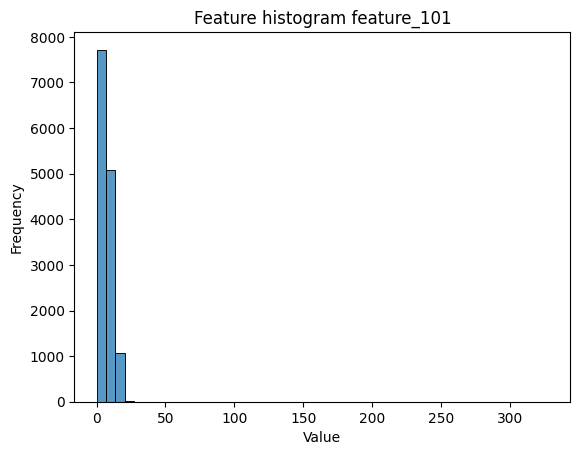

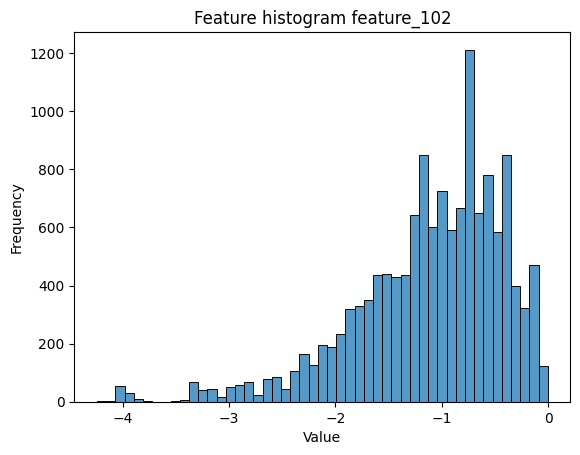

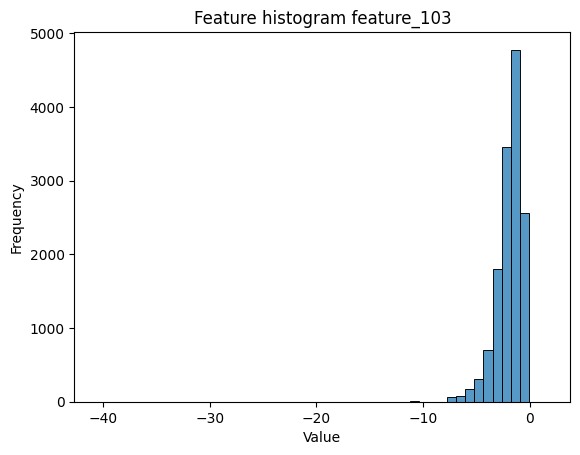

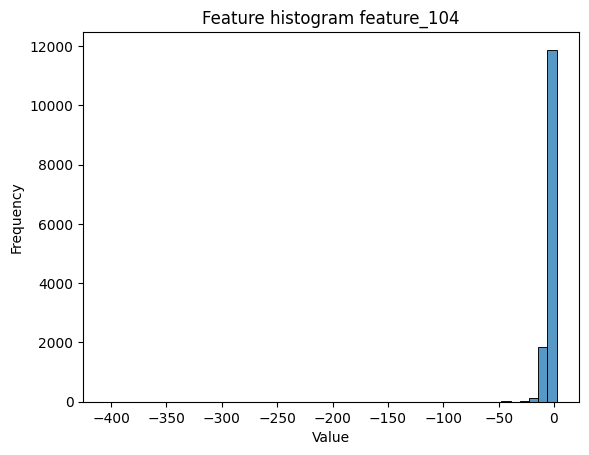

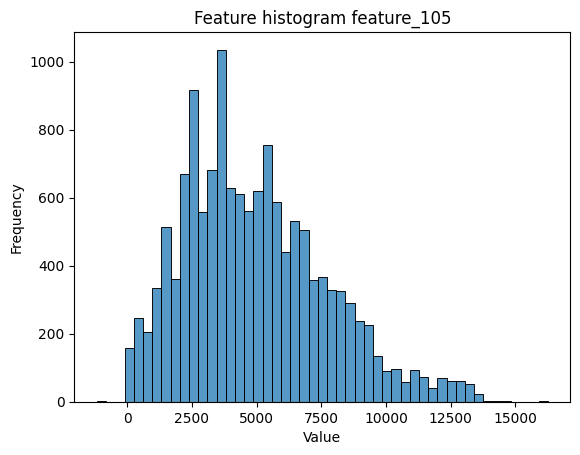

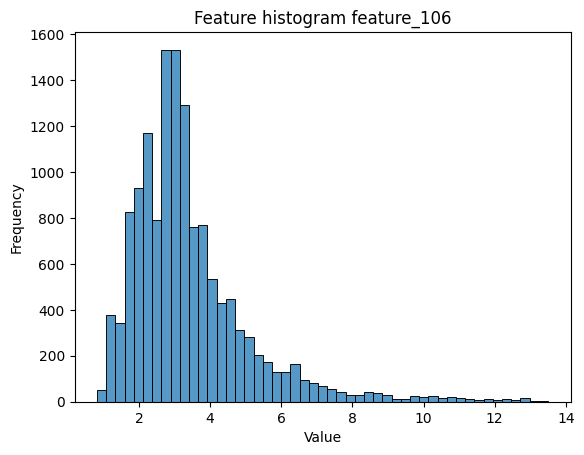

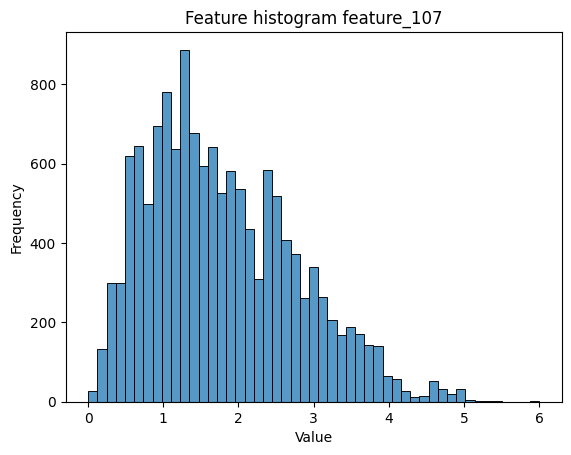

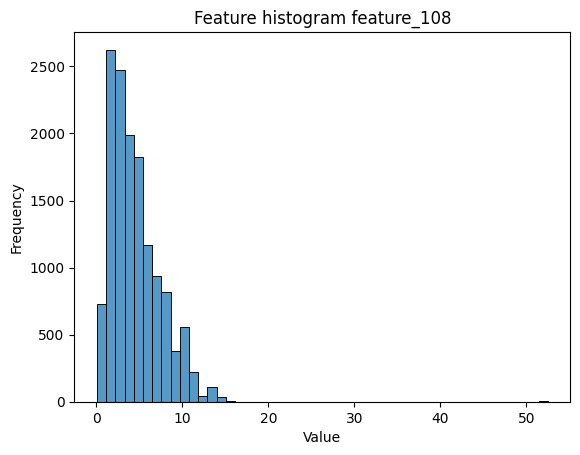

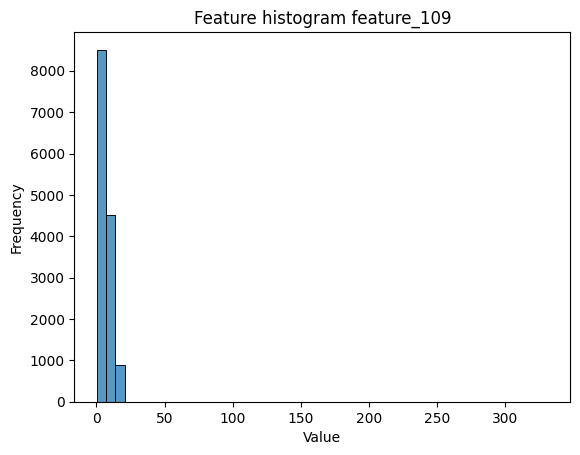

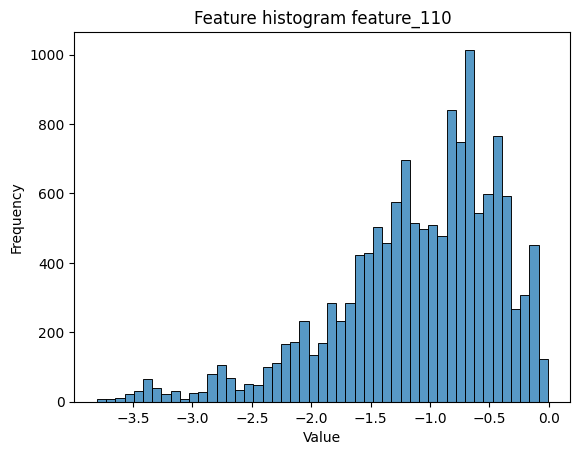

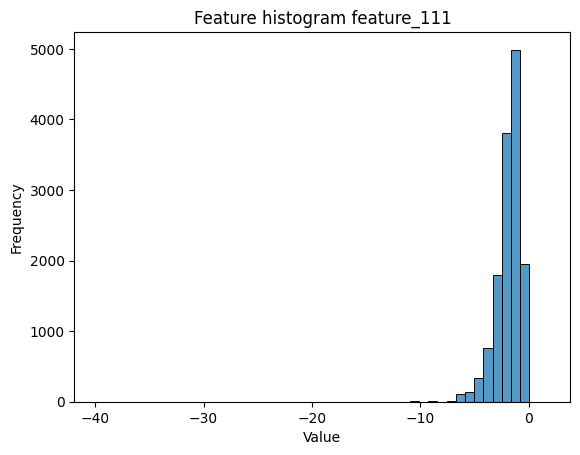

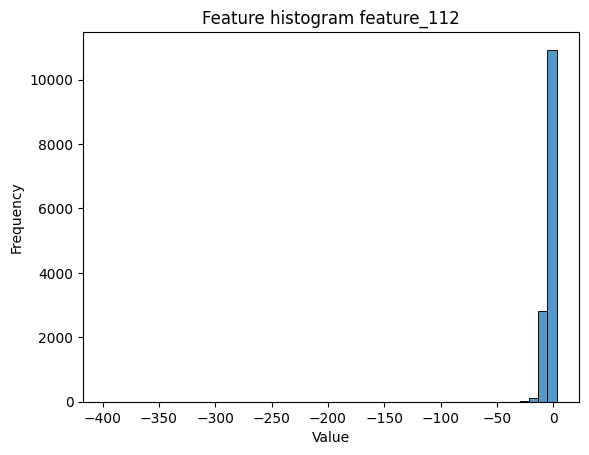

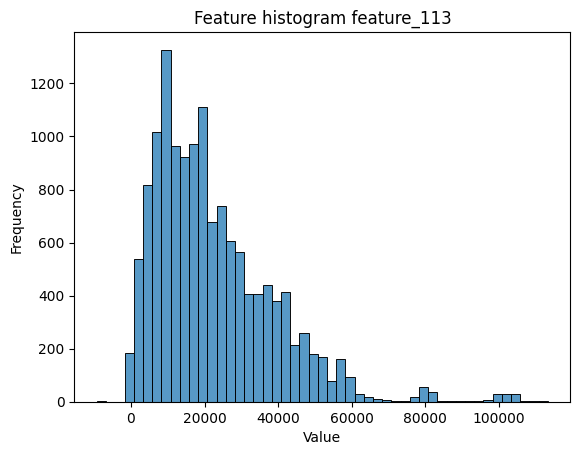

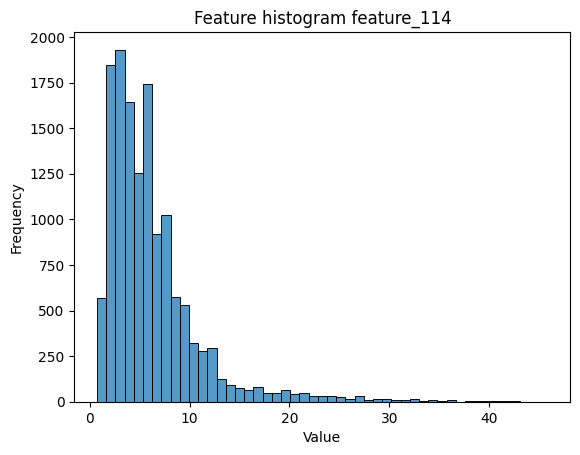

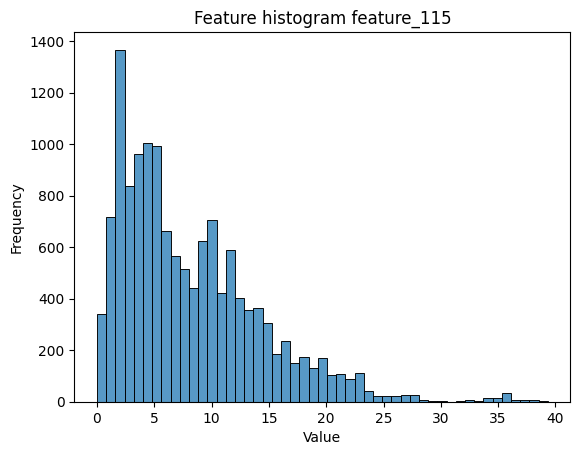

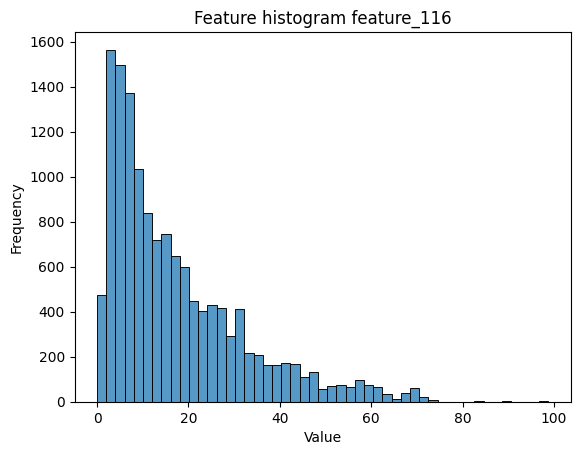

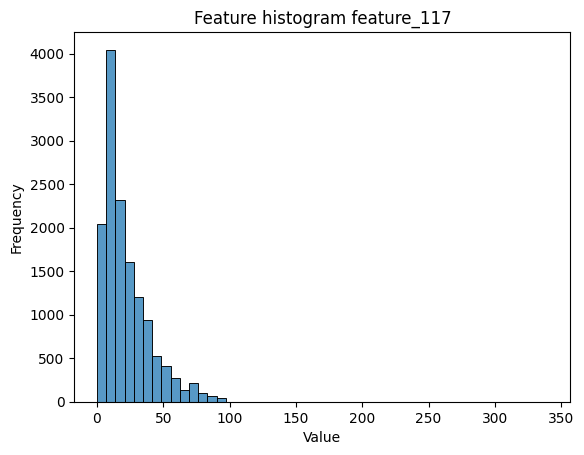

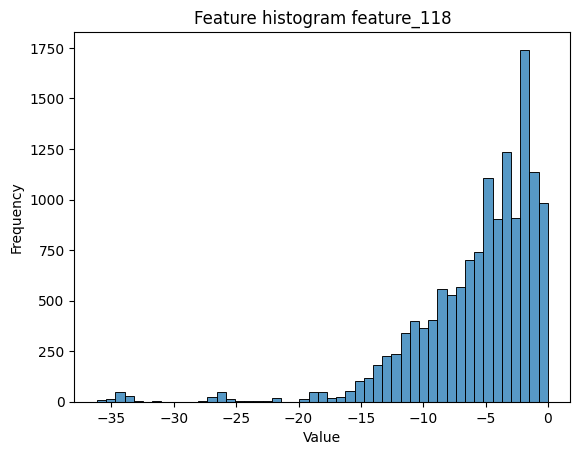

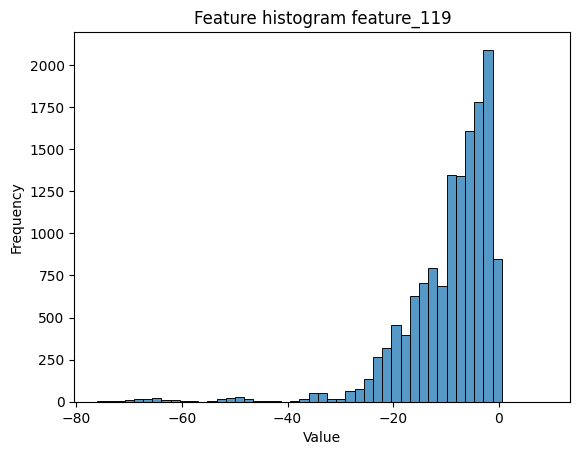

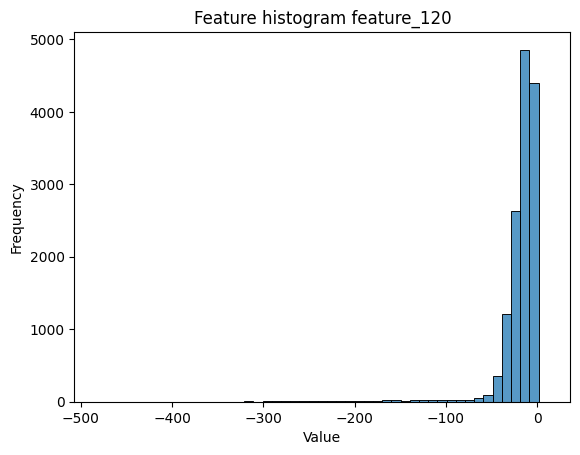

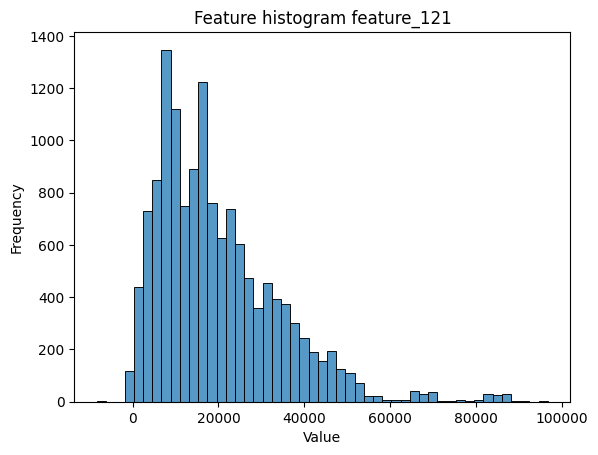

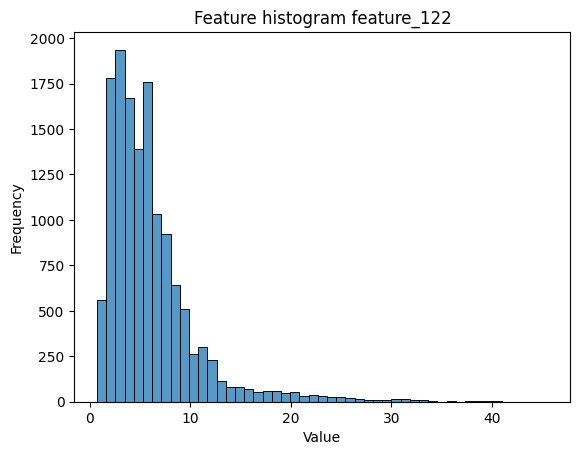

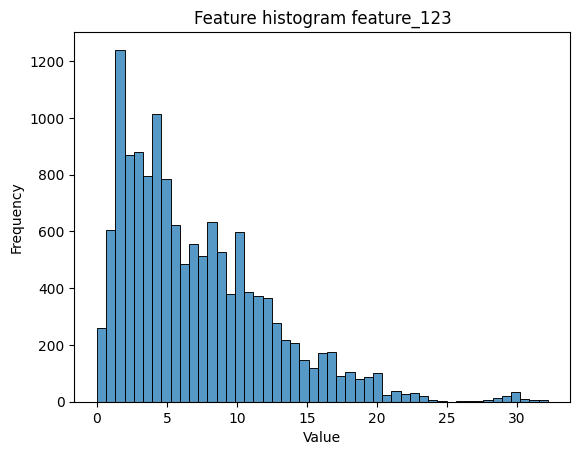

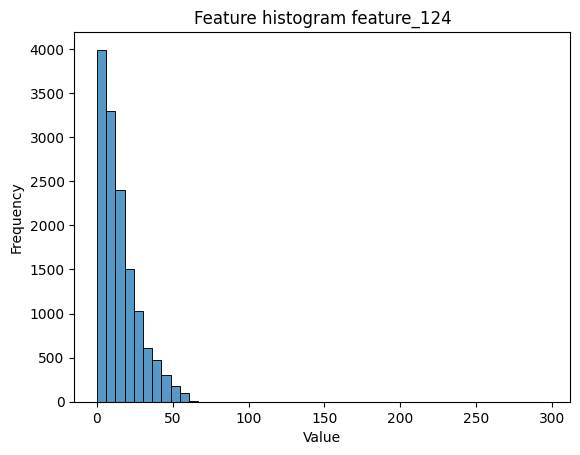

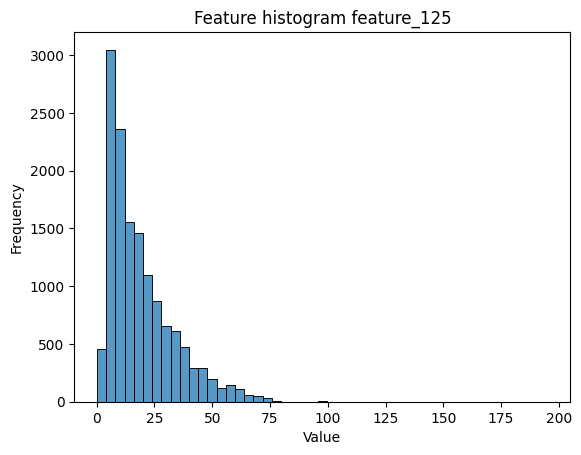

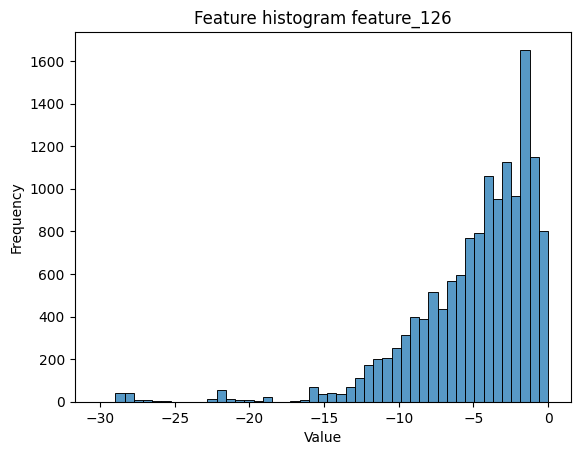

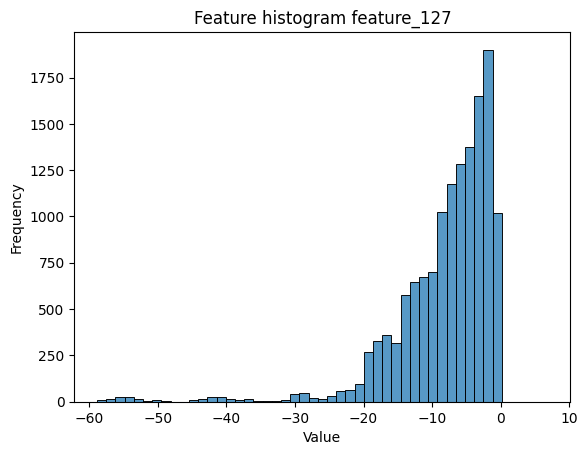

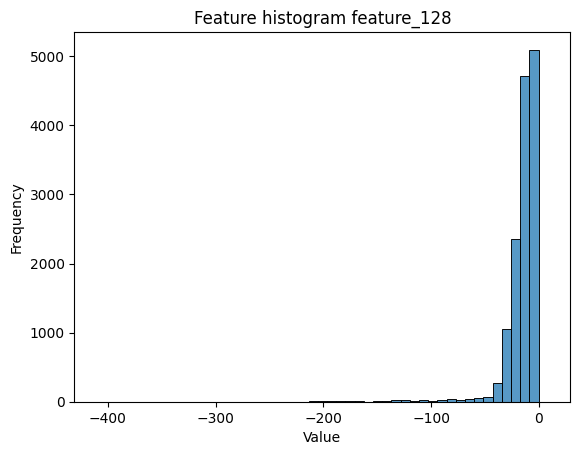

In [33]:
# Function to transform a row of data into tabular format
def transform_data_row(row):
    features = {f"feature_{int(f.split(':')[0])}": float(f.split(':')[1]) for f in row[1:] if pd.notnull(f)}
    return features

# Read and transform all data into features
all_features = pd.concat([pd.read_csv(fp, sep=" ", header=None).apply(transform_data_row, axis=1, result_type='expand') for fp in file_paths])

# Generate histograms for each feature
for col in all_features.columns:
    plt.figure()
    sns.histplot(all_features[col], bins='rice')
    plt.title(f"Feature histogram {col}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

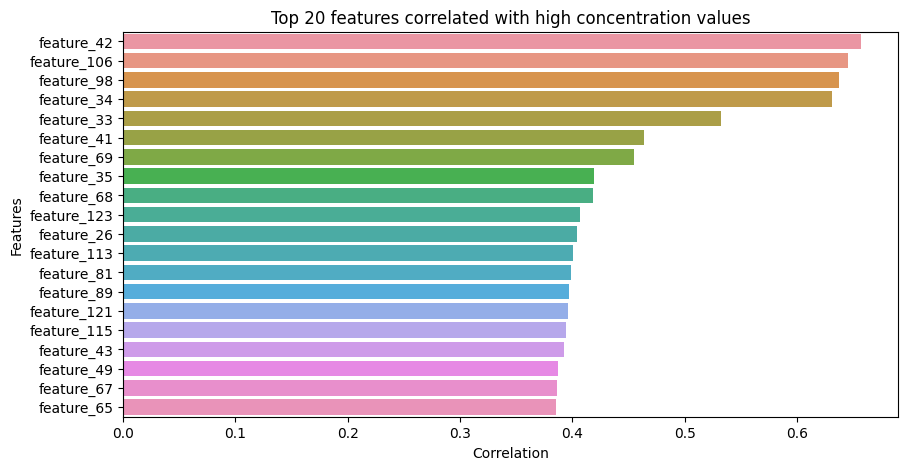

In [34]:
import numpy as np

# Add concentrations to features
all_features_with_concentration = pd.concat([all_features.reset_index(drop=True), all_data['concentration'].reset_index(drop=True)], axis=1)

# Function to identify and calculate correlations
def find_extreme_correlations(df, concentration_col='concentration', threshold=300):
    extreme_correlations = {}
    for col in df.columns[:-1]:  # Exclude the concentration column
        # Calculate extreme values
        upper_bound = df[col].quantile(0.75) + 1.5 * iqr(df[col])
        extreme_values = df[col] > upper_bound
        high_concentrations = df[concentration_col] > threshold

        # Calculate and check the correlation
        if extreme_values.any() and high_concentrations.any():  # Ensure that both variables vary
            correlation = np.corrcoef(extreme_values, high_concentrations)[0, 1]
            if not np.isnan(correlation):
                extreme_correlations[col] = correlation
    return extreme_correlations

correlations = find_extreme_correlations(all_features_with_concentration)

# Displaying results as a barplot
correlations_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation']).sort_values(by='Correlation', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Correlation', y='Feature', data=correlations_df.head(20))
plt.title('Top 20 features correlated with high concentration values')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

In [35]:
# Find features with just one unique value
single_value_features = [col for col in all_features.columns if all_features[col].nunique() == 1]

# Show the list of characteristics with a single unique value
print(single_value_features)

[]


**Outliers**:
* The correlation chart shows that some features have significant correlations with high concentrations. This might mean that outliers in these features are actually related to extreme conditions that could be of interest for detecting high-concentration gases. Therefore, these values are not entirely outliers in the sense that they might be relevant for modeling: hence, the decision is to keep them.

**Distribution of Features**:
* Looking at the box plots after outliers were taken out, it's clear that most features show enough variation to be useful in building predictive models. Some features, like feature_42, may not follow a typical distribution but are still valuable for predicting when gas concentrations are high. Therefore, the plan is to keep all features for the time being.

## Step 5: Correlation between Features



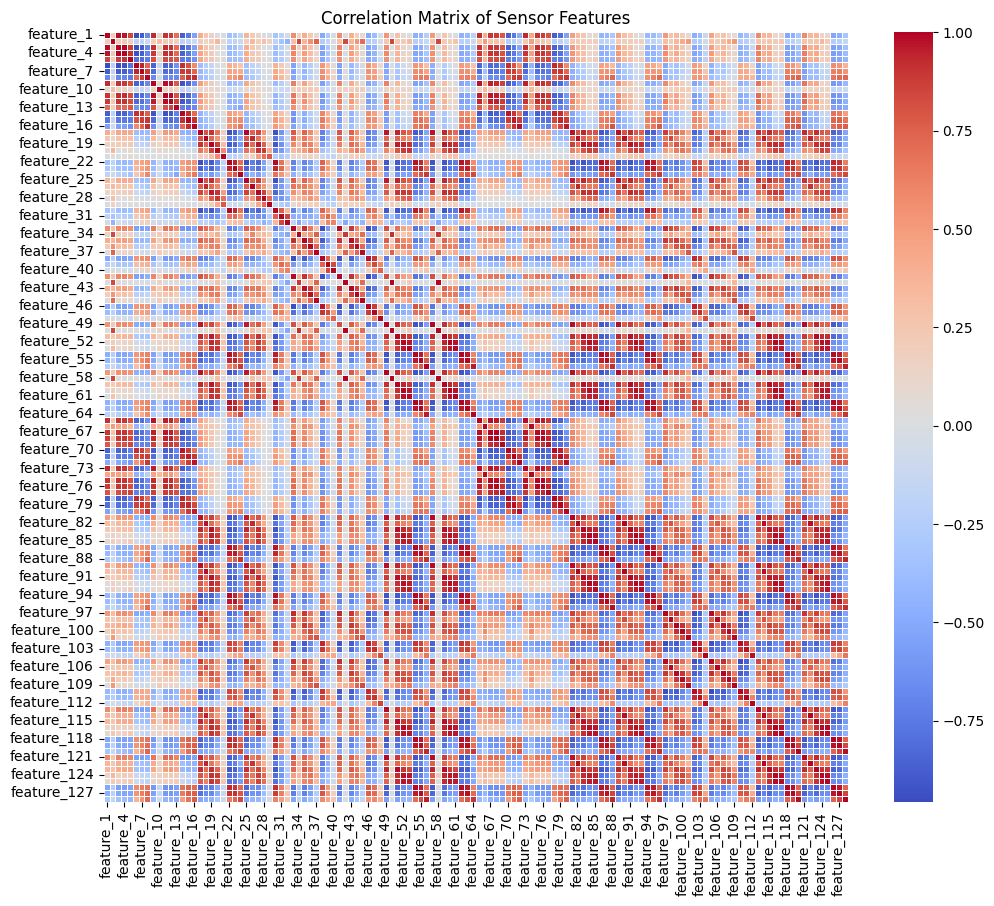

In [36]:
# Calculation of the correlation matrix
correlation_matrix = all_features.corr()  # Exclude 'gas_type' and 'concentration'

# Visualization of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix of Sensor Features")
plt.show()

In this heatmap each square shows how strongly each pair of features is correlated. Colors closer to red indicate a stronger positive correlation, while colors closer to blue indicate a stronger negative correlation. White or lighter areas suggest little to no correlation.

This analysis reveals clusters of features that are strongly correlated with each other, meaning they're likely providing similar information or showing how sensors are related.

However, as nonlinear models are initially considered, and given the specificity of some distributions seen previously, it is possible to retain all features. If a linear model is later considered, which assumes independent features, then a closer look at feature selection might be necessary to avoid issues with redundant data.

## Step 6: Analysis Over Time

In [37]:
# File paths
data_files_paths = [
    '/content/gdrive/MyDrive/ColabNotebooks/Term_Project/extracted_gas_sensor_data/gas+sensor+array+drift+dataset+at+different+concentrations/batch{}.dat'.format(i) for i in range(1, 11)
]

# Function to read and transform a data file
def read_and_transform(file_path, batch_id):
    data = pd.read_csv(file_path, sep=" ", header=None)

    # Extraction of gas type and concentration
    data[['gas_type', 'concentration']] = data[0].str.split(';', expand=True)
    data['gas_type'] = data['gas_type'].astype(int)
    data['concentration'] = data['concentration'].astype(float)
    data['batch'] = batch_id

    # Deleting the first column
    data.drop(columns=[0], inplace=True)

    # Transform columns 1 to 128 to keep only the numerical value
    for col in range(1, 129):
        data[col] = data[col].str.split(':').str[1].astype(float)

    return data

# Reading and transforming data from all batches
all_data = pd.concat([read_and_transform(path, i) for i, path in enumerate(data_files_paths, 1)], ignore_index=True)

labels=["Ethanol", "Ethylene", "Ammonia", "Acetaldehyde", "Acetone", "Toluene"]

In [ ]:
for gaz_id in range(1, 7):

    # Filter data for this specific gas
    filtered_data = all_data[all_data['gas_type'] == gaz_id]

    # Creating a color palette with a unique color for each concentration
    unique_concentrations = filtered_data['concentration'].unique()
    palette = sns.color_palette("viridis", len(unique_concentrations))

    # Creating a dictionary to map each concentration to a color
    palette_dict = dict(zip(unique_concentrations, palette))

    # Creation of graphs for each feature
    for feature in filtered_data.columns[:128]:  # Exclude the 'gas_type', 'concentration', 'batch' columns and the NaN column
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=filtered_data, x='batch', y=feature, hue='concentration', palette=palette_dict, marker='o')
        plt.title(f'{labels[gaz_id-1]} Concentration Analysis : Trend of feature_{feature}\n with Respect to {labels[gaz_id-1]} Concentration')
        plt.xlabel('Batch (time ordered)')
        plt.ylabel(f'Value of feature_{feature}')
        ax = plt.gca()
        ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=4))
        plt.legend([], [], frameon=False)
        plt.tight_layout()
        plt.show()

**To enable the file's upload to GitHub, the figures were removed, reducing its size from 142 MB to within GitHub's file size limits.**

**Conclusions from these figures**:

* If the sensors were perfect, all the previous figures should represent by straight horizontal lines on a graph. None of the figures show this: as expected, there is indeed a drift in the sensor features. However, this drift is never regular, posing a problem for calibration. To create a reliable model, it must be designed to handle this kind of unpredictable drift.

* Correcting drift could theoretically be done with statistical or machine learning models that handle non-linear patterns, but without actual reference data to validate against, we'd have to use techniques like cross-validation.

* The lack of time-related data prevents us from predicting future drift using time series analysis. Any model we create would need to be regularly updated with new data to stay accurate.

* Considering a strategy for future data collection including time stamps could significantly improve the calibration and prediction of sensor drift.

* Finally, the model will have very limited performance without calibrated reference data. Continuous model updates and recalibration will be crucial to keep sensor readings reliable.



# Modeling

The earlier study revealed that the way sensors react—how quickly they respond, how precise their readings are, and at what point they begin to detect gases—changes depending on the level of gas present.

**RMSE (Root Mean Square Error)**

It is a commonly used performance indicator to assess the accuracy of regression models. Here are several reasons justifying the choice of RMSE as a metric:

- **Sensitivity to Large Deviations**: RMSE gives more weight to large differences between predicted and actual values due to the squaring of errors, highlighting cases where the model significantly errs.

- **Consistent Units**: RMSE is expressed in the same units as the target variable, making the interpretation of results easier. For instance, if we are predicting concentration in ppm, an RMSE of 5 means the typical prediction is within 5 ppm of the actual value.

- **Comparability**: RMSE lets you see which models or settings work best by directly comparing their scores.

- **Popularity and Understanding**: RMSE is a common and well-understood statistic, so most people working with data will know what the results mean.

- **Robustness in the Presence of Noise**: Although sensitive to outliers, RMSE remains a robust measure when there is noise in the data, which is often the case in sensor measurements.

**Mean Absolute Error (MAE)**
- **Direct Interpretability**: MAE measures the average magnitude of errors in predictions, providing a straightforward interpretation. It directly represents the average error in the same units as the data.

- **Less Sensitive to Outliers**: Unlike RMSE, MAE is not overly sensitive to large deviations because it does not square the errors. This makes it more robust in the presence of outliers.

- **Error Accumulation**: It accumulates all the individual differences between predicted and actual values, giving a cumulative measure of error magnitude.


**Mean Squared Error (MSE)**
- **Emphasis on Larger Errors**: MSE squares the differences between predicted and actual values, heavily penalizing larger errors more than smaller ones. This characteristic makes it particularly useful in scenarios where avoiding large deviations is crucial.

- **Not Directly Interpretable**: The units of MSE are the square of the target variable's units, making it less interpretable than MAE or RMSE. It's more useful as a relative measure of model performance rather than an absolute one.

- **Useful for Optimization**: In many machine learning algorithms, MSE is a common loss function because its derivative is linear and thus easier to optimize.


**R² Score (Coefficient of Determination)**
- **Explained Variability**: R² quantifies the amount of variance in the dependent variable that is predicted from the independent variables. A higher R² indicates a model that explains more of the variability.

- **Scale-Free Measure**: It provides a scale-free assessment of the model's predictive power, making it useful for comparing models across different datasets or problem domains.

- **Not Always a Definitive Measure**: A high R² does not always signify a good model. For example, it can be artificially high in overfitted models. It should be interpreted alongside other metrics.

Using a combination of these metrics provides a more comprehensive evaluation of a model's performance than relying on a single metric

In [38]:
# Function to read and transform data from a file
def read_and_transform(file_path):
    data = pd.read_csv(file_path, sep=" ", header=None)
    transformed = data.apply(lambda row: {"gas_type": int(row[0].split(';')[0]),
                                          "concentration": float(row[0].split(';')[1])}, axis=1, result_type='expand')
    return transformed

# Data file path
base_path = '/content/gdrive/MyDrive/ColabNotebooks/Term_Project/extracted_gas_sensor_data/gas+sensor+array+drift+dataset+at+different+concentrations'
file_paths = [f"{base_path}/batch{i}.dat" for i in range(1, 11)]

# Read and combine all data
all_data = pd.concat([read_and_transform(fp) for fp in file_paths])

## Model 1 - Decision Tree

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# StandardScaler for feature normalization
scaler = StandardScaler()

# Preparation of Subsets
group1 = all_data['gas_type'] == 1  # Ethanol
group2 = all_data['gas_type'].isin([4, 6])  # Acetaldehyde and Toluene
group3 = all_data['gas_type'].isin([2, 3, 5])  # Other gases

# Feature normalization
X_scaled = scaler.fit_transform(all_features)

# Setting hyperparameter ranges for grid search
param_grid_dt = {
    # Initial Grid Search
    #'max_depth': [None, 10, 20, 30, 40, 50],
    #'min_samples_leaf': [1, 2, 4, 6, 8],
    #'min_samples_split': [2, 5, 10, 15, 20]
    # Grid search for the optimal values (time saving)
    'max_depth': [None, 20],
    'min_samples_leaf':[1,2,4],
    'min_samples_split':[10,15]
}

# Function to train and evaluate a decision tree model with grid search
def train_and_evaluate_dt(X, y, cv=5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    dt_regressor = DecisionTreeRegressor(random_state=42)
    grid_search_dt = GridSearchCV(dt_regressor, param_grid_dt, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search_dt.fit(X_train, y_train)

    best_params_dt = grid_search_dt.best_params_
    best_dt = grid_search_dt.best_estimator_

    # Predictions
    predictions_dt = best_dt.predict(X_test)

    # Calculating metrics
    rmse_dt = np.sqrt(mean_squared_error(y_test, predictions_dt))
    mae_dt = mean_absolute_error(y_test, predictions_dt)
    mse_dt = mean_squared_error(y_test, predictions_dt)
    r2_dt = r2_score(y_test, predictions_dt)

    return best_dt, rmse_dt, mae_dt, mse_dt, r2_dt, best_params_dt

# Training and evaluation of decision tree models for each group
y = all_data['concentration']
dt_model_group1, rmse_group1_dt, mae_group1_dt, mse_group1_dt, r2_group1_dt, params_group1_dt = train_and_evaluate_dt(X_scaled[group1], y[group1], cv=5)
dt_model_group2, rmse_group2_dt, mae_group2_dt, mse_group2_dt, r2_group2_dt, params_group2_dt = train_and_evaluate_dt(X_scaled[group2], y[group2], cv=5)
dt_model_group3, rmse_group3_dt, mae_group3_dt, mse_group3_dt, r2_group3_dt, params_group3_dt = train_and_evaluate_dt(X_scaled[group3], y[group3], cv=5)

# Printing the metrics for Group 1 (Ethanol)
print(f"Group 1 (Ethanol) Decision Tree Metrics:")
print(f"RMSE: {rmse_group1_dt}, MAE: {mae_group1_dt}, MSE: {mse_group1_dt}, R² Score: {r2_group1_dt}")
print(f"Best Params: {params_group1_dt}\n")

# Printing the metrics for Group 2 (Acetaldehyde and Toluene)
print(f"Group 2 (Acetaldehyde and Toluene) Decision Tree Metrics:")
print(f"RMSE: {rmse_group2_dt}, MAE: {mae_group2_dt}, MSE: {mse_group2_dt}, R² Score: {r2_group2_dt}")
print(f"Best Params: {params_group2_dt}\n")

# Printing the metrics for Group 3 (Other gases)
print(f"Group 3 (Other gases) Decision Tree Metrics:")
print(f"RMSE: {rmse_group3_dt}, MAE: {mae_group3_dt}, MSE: {mse_group3_dt}, R² Score: {r2_group3_dt}")
print(f"Best Params: {params_group3_dt}\n")

Group 1 (Ethanol) Decision Tree Metrics:
RMSE: 28.650399462707654, MAE: 6.023449828274389, MSE: 820.8453893727191, R² Score: 0.9021306480680643
Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}

Group 2 (Acetaldehyde and Toluene) Decision Tree Metrics:
RMSE: 23.688398225366264, MAE: 7.867555190167922, MSE: 561.1402104835355, R² Score: 0.8850171811089149
Best Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 15}

Group 3 (Other gases) Decision Tree Metrics:
RMSE: 37.53016108832688, MAE: 11.86199741314013, MSE: 1408.512991315765, R² Score: 0.9689009141874514
Best Params: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 15}



The results indicate that the metrics for groups 1 and 2 are significantly lower than for group 3. This could mean that the models for groups 1 and 2 are better fitted and that the features of the sensors for these specific gases (Ethanol, Acetaldehyde, and Toluene) have clearer relationships with the concentrations than those of the gases grouped in group 3.

The fact that group 3 shows higher metrics and required different hyperparameter tuning (maximum depth and minimum number of samples per leaf) suggests that the sensor features for these gases are more heterogeneous or that the drift is more complex to model. This could be due to differences in the physical or chemical properties of the gases, or differences in how the sensors interact with these gases. Although the higher R² score suggests a good fit, it might also indicate overfitting, especially considering the high RMSE and MAE values.

Based on these observations, here are some suggestions for moving forward:

* **Finer Segmentation**: Considering further segmenting group 3 and training separate models for each individual gas. This could allow us to capture more specific patterns for each gas and improve the calibration performance for these gases.

*	**Cross-Validation**: Testing the model using more thorough cross-validation to evaluate the robustness of the model.

* **Analysis of Variance**: Examining the variance of errors for each group can help understand if some gases are more predictable than others and if the current segmentation is logical.

* **Feature Importance**: Analyzing the importance of features for each gas model could reveal which sensors or features are most informative for predicting concentrations.

* **Additional Validation**: Before dismissing the aggregated model for the other gases, ensure to validate the model's performance using different metrics and test the model's robustness on unseen data.

* **Experimenting with Other Models**: It is also wise to experiment with other types of machine learning models, as some models may be more suited to capturing the complex relationships between features and concentrations for group 3





In [17]:
dt_model_inc_group1, rmse_inc_group1_dt, mae_inc_group1_dt, mse_inc_group1_dt, r2_inc_group1_dt, params_inc_group1_dt = train_and_evaluate_dt(X_scaled[group1], y[group1], cv=15)
dt_model_inc_group2, rmse_inc_group2_dt, mae_inc_group2_dt, mse_inc_group2_dt, r2_inc_group2_dt, params_inc_group2_dt = train_and_evaluate_dt(X_scaled[group2], y[group2], cv=15)
dt_model_inc_group3, rmse_inc_group3_dt, mae_inc_group3_dt, mse_inc_group3_dt, r2_inc_group3_dt, params_inc_group3_dt = train_and_evaluate_dt(X_scaled[group3], y[group3], cv=15)

# Printing the metrics for Group 1 (Ethanol)
print(f"Increased number of cross-validation folds Group 1 (Ethanol) Decision Tree Metrics:")
print(f"RMSE: {rmse_inc_group1_dt}, MAE: {mae_inc_group1_dt}, MSE: {mse_inc_group1_dt}, R² Score: {r2_inc_group1_dt}")
print(f"Best Params: {params_group1_dt}\n")

# Printing the metrics for Group 2 (Acetaldehyde and Toluene)
print(f"Increased number of cross-validation folds Group 2 (Acetaldehyde and Toluene) Decision Tree Metrics:")
print(f"RMSE: {rmse_inc_group2_dt}, MAE: {mae_inc_group2_dt}, MSE: {mse_inc_group2_dt}, R² Score: {r2_inc_group2_dt}")
print(f"Best Params: {params_group2_dt}\n")

# Printing the metrics for Group 3 (Other gases)
print(f"Increased number of cross-validation folds Group 3 (Other gases) Decision Tree Metrics:")
print(f"RMSE: {rmse_inc_group3_dt}, MAE: {mae_inc_group3_dt}, MSE: {mse_inc_group3_dt}, R² Score: {r2_inc_group3_dt}")
print(f"Best Params: {params_group3_dt}\n")

Increased number of cross-validation folds Group 1 (Ethanol) Decision Tree Metrics:
RMSE: 23.616223929723294, MAE: 5.3199124354095115, MSE: 557.7260326988351, R² Score: 0.9335023549105669
Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}

Increased number of cross-validation folds Group 2 (Acetaldehyde and Toluene) Decision Tree Metrics:
RMSE: 21.745263400781624, MAE: 7.9700038945728595, MSE: 472.8564803693729, R² Score: 0.903107333910474
Best Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 15}

Increased number of cross-validation folds Group 3 (Other gases) Decision Tree Metrics:
RMSE: 34.75646758527764, MAE: 11.315245843280142, MSE: 1208.0120390064556, R² Score: 0.973327849799554
Best Params: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 15}



Increasing the number of cross-validation folds from 5 to 15 improved all the metrics for all groups, indicating that a more extensive cross-validation provides a more accurate assessment of the Decision Tree model's performance

In a second approach, less simplistic, we can opt for random forest regression, which is often more effective than individual decision trees, particularly because it reduces overfitting by averaging the predictions of many decision trees trained on subsets of the data.

* **Data Complexity**:
The data for a certain group of gases are particularly complex, and the relationships between the features and the target are nonlinear, meaning simple decision trees might not be sufficient. Random forests, by combining several trees, can better capture these complexities.

* **Overfitting**:
Decision trees tend to overfit, especially if the tree depth is not limited (max_depth: None). Random forests reduce the risk of overfitting by averaging the predictions of many trees.

* **Robustness and Variability**:
Random forests are generally more robust against variations in the data. If the data of a group show high variability, an ensemble approach like RF could provide more stable results.

* **Better Overall Performance**:
In practice, random forests often tend to offer better performance than single decision trees, due to their ability to act as ensemble models.

* **Feature Management**:
Random forests handle a large number of features better and are capable of determining the relative importance of different features. [Working on importance, and possibly explainability with SHAP, subsequently]

* **Justification for Switching to RF Model**:
The RMSEs are relatively high, which may indicate that decision trees are not complex enough to model the data. The best parameters of DTs suggest a great depth (max_depth: None or high) and a small minimum number of samples per leaf, indicating a need for more robust modeling to avoid overfitting.

Furthermore, **the final evaluation of the model must be performed on the test set**. The validation set is used for hyperparameter tuning and model selection during the development phase. Once the model is finalized and the best parameters are selected, its performance must be evaluated on the test set, a dataset the model has never seen before. This ensures that the evaluation is unbiased and reflects the model's performance in real-world conditions

## Model 2 - Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import numpy as np

# Setting initial hyperparameter ranges for grid search
#param_grid_rf = {
    # Initial Grid Search
    #'n_estimators': [100, 200, 300],
    #'max_depth': [None, 10, 20, 30],
    #'min_samples_leaf': [1, 2, 4],
    #'min_samples_split': [2, 5, 10]
#}

# Optimal parameters got from Grid Search for time-saving
params_group1 = {'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
params_group2 = {'n_estimators': 300, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
params_group3 = {'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}


def train_and_evaluate_rf_with_cv(X, y, params,cv_folds=5):
    # Splitting the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize RandomForestRegressor with provided parameters
    rf_regressor = RandomForestRegressor(**params, random_state=42)

    # Define 5-fold cross-validation
    kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

    # Cross-validation for RMSE
    neg_rmse_scores = cross_val_score(rf_regressor, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
    avg_rmse_cv = -1 * np.mean(neg_rmse_scores)

    # Cross-validation for MAE
    mae_scores = cross_val_score(rf_regressor, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
    avg_mae_cv = -1 * np.mean(mae_scores)

    # Training the model on the full training set
    rf_regressor.fit(X_train, y_train)

    # Model evaluation on the test set
    predictions_test_rf = rf_regressor.predict(X_test)

    # Calculating metrics
    rmse_test_rf = np.sqrt(mean_squared_error(y_test, predictions_test_rf))
    mae_test_rf = mean_absolute_error(y_test, predictions_test_rf)
    mse_test_rf = mean_squared_error(y_test, predictions_test_rf)
    r2_test_rf = r2_score(y_test, predictions_test_rf)

    return rf_regressor, avg_rmse_cv, avg_mae_cv, rmse_test_rf, mae_test_rf, mse_test_rf, r2_test_rf

In [ ]:
# Training and evaluation of random forest models for each group
y = all_data['concentration']
rf_model_group1, avg_rmse_cv_group1, avg_mae_cv_group1, rmse_test_group1, mae_test_group1, mse_test_group1, r2_test_group1 = train_and_evaluate_rf_with_cv(X_scaled[group1], y[group1], params_group1, cv_folds=5)
rf_model_group2, avg_rmse_cv_group2, avg_mae_cv_group2, rmse_test_group2, mae_test_group2, mse_test_group2, r2_test_group2 = train_and_evaluate_rf_with_cv(X_scaled[group2], y[group2], params_group2, cv_folds=5)
rf_model_group3, avg_rmse_cv_group3, avg_mae_cv_group3, rmse_test_group3, mae_test_group3, mse_test_group3, r2_test_group3 = train_and_evaluate_rf_with_cv(X_scaled[group3], y[group3], params_group3, cv_folds=5)

In [22]:
# Print results for each group
print(f"Group 1 (Ethanol) Random Forest Metrics:")
print(f"Test RMSE: {rmse_test_group1}, Test MAE: {mae_test_group1}, Test MSE: {mse_test_group1}, Test R²: {r2_test_group1}\n")
print(f"Best Params: {params_group1_dt}\n")

print(f"Group 2 (Acetaldehyde and Toluene) Random Forest Metrics:")
print(f"Test RMSE: {rmse_test_group2}, Test MAE: {mae_test_group2}, Test MSE: {mse_test_group2}, Test R²: {r2_test_group2}\n")
print(f"Best Params: {params_group2_dt}\n")

print(f"Group 3 (Other gases) Random Forest Metrics:")
print(f"Test RMSE: {rmse_test_group3}, Test MAE: {mae_test_group3}, Test MSE: {mse_test_group3}, Test R²: {r2_test_group3}\n")
print(f"Best Params: {params_group3_dt}\n")

Group 1 (Ethanol) Random Forest Metrics:
Test RMSE: 16.247355719559543, Test MAE: 4.4362762357410395, Test MSE: 263.9765678779042, Test R²: 0.9685260879114274

Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}

Group 2 (Acetaldehyde and Toluene) Random Forest Metrics:
Test RMSE: 16.654359571922445, Test MAE: 5.956263808987947, Test MSE: 277.3676927508847, Test R²: 0.943164794491681

Best Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 15}

Group 3 (Other gases) Random Forest Metrics:
Test RMSE: 25.205721230632705, Test MAE: 9.015027910688675, Test MSE: 635.3283827563682, Test R²: 0.9859723467115267

Best Params: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 15}



The values of the best parameters (best params) for each gas group provide valuable information on how the Random Forest (RF) model adapts to the different data features. Here are some observations and future steps to improve the model:


### Maximum Depth (max_depth):
* For Group 1 (Ethanol), a maximum depth of 10 seems sufficient. This suggests that the model does not need to go too deep to capture the relationships in the data.

* For Group 2 (Acetaldehyde and Toluene), the depth is not limited (None). This may indicate that the complexity of the data requires more in-depth exploration.

* For Group 3 (Other gases), a maximum depth of 30 is chosen, indicating even greater complexity in the data.

### Minimum Number of Samples for a Leaf (min_samples_leaf):
* For Groups 1 and 3, a single sample per leaf is optimal, while for Group 2, two samples per leaf yield better results. This may indicate greater variability in Group 2.

### Number of Trees (n_estimators):
* Higher values for Groups 1 and 2 (200 and 300 respectively) may indicate a need for more robust models to capture the complexity of the data. For Group 3, 200 is sufficient.

### Comments:
* The differences in the best parameters between the groups suggest distinct data features for each type of gas. This justifies the separate modeling approach for each group.

* A lower maximum depth for Group 1 may indicate a simpler relationship between the features and the concentration, while Groups 2 and 3, with a higher maximum depth, may have more complex relationships or more noise in the data.

### Next Steps to Improve the Model:
* **Feature Exploration**: Examine the features to determine if some are more informative than others. Feature engineering could help improve performance.

* **Data Balancing**: If certain concentrations are underrepresented in the data, class balancing techniques might be useful.
Experimenting with Other Models: In addition to random forests, testing other machine learning models might reveal approaches better suited to the data.

* **Cross-Validation**: Use more thorough cross-validation to evaluate the robustness of the model.

* **Error Analysis**: Examine cases where the model errs the most to understand the limits of the current approach.

* **Hyperparameter Optimization**: Continue adjusting hyperparameters, perhaps with more advanced optimization methods like Random Search or Bayesian Optimization.

* **Ensemble Learning Techniques**: Combining multiple models or using approaches like boosting to improve performance

In [41]:
# Training and evaluation of random forest models with increased cross-validation folds for each group
y = all_data['concentration']
rf_model_inc_group1, avg_rmse_inc_cv_group1, avg_mae_inc_cv_group1, rmse_test_inc_group1, mae_test_inc_group1, mse_test_inc_group1, r2_test_inc_group1 = train_and_evaluate_rf_with_cv(X_scaled[group1], y[group1], params_group1, cv_folds=15)
rf_model_inc_group2, avg_rmse_inc_cv_group2, avg_mae_inc_cv_group2, rmse_test_inc_group2, mae_test_inc_group2, mse_test_inc_group2, r2_test_inc_group2 = train_and_evaluate_rf_with_cv(X_scaled[group2], y[group2], params_group2, cv_folds=15)
rf_model_inc_group3, avg_rmse_inc_cv_group3, avg_mae_inc_cv_group3, rmse_test_inc_group3, mae_test_inc_group3, mse_test_inc_group3, r2_test_inc_group3 = train_and_evaluate_rf_with_cv(X_scaled[group3], y[group3], params_group3, cv_folds=15)

In [42]:
# Displaying the evaluation results on the test set
print(f"Increased number of cross-validation folds in Group 1 (Ethanol) Random Forest Metrics:")
print(f"Test RMSE: {rmse_test_inc_group1}, Test MAE: {mae_test_inc_group1}, Test MSE: {mse_test_inc_group1}, Test R²: {r2_test_inc_group1}")
print(f"Best Params: {params_group1}\n")

print(f"Increased number of cross-validation folds in Group 2 (Acetaldehyde and Toluene) Random Forest Metrics:")
print(f"Test RMSE: {rmse_test_inc_group2}, Test MAE: {mae_test_inc_group2}, Test MSE: {mse_test_inc_group2}, Test R²: {r2_test_inc_group2}")
print(f"Best Params: {params_group2}\n")

print(f"Increased number of cross-validation folds in Group 3 (Other gases) Random Forest Metrics:")
print(f"Test RMSE: {rmse_test_inc_group3}, Test MAE: {mae_test_inc_group3}, Test MSE: {mse_test_inc_group3}, Test R²: {r2_test_inc_group3}")
print(f"Best Params: {params_group3}\n")

Increased number of cross-validation folds in Group 1 (Ethanol) Random Forest Metrics:
Test RMSE: 16.247355719559543, Test MAE: 4.4362762357410395, Test MSE: 263.9765678779042, Test R²: 0.9685260879114274
Best Params: {'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

Increased number of cross-validation folds in Group 2 (Acetaldehyde and Toluene) Random Forest Metrics:
Test RMSE: 16.654359571922445, Test MAE: 5.956263808987947, Test MSE: 277.3676927508847, Test R²: 0.943164794491681
Best Params: {'n_estimators': 300, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}

Increased number of cross-validation folds in Group 3 (Other gases) Random Forest Metrics:
Test RMSE: 25.205721230632705, Test MAE: 9.015027910688675, Test MSE: 635.3283827563682, Test R²: 0.9859723467115267
Best Params: {'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}



Using 15 folds for cross-validation with the Random Forest model did not result in any changes of the metric scores for all groups compared to using 5 folds. This suggests that the model's performance is stable and consistent across different cross-validation settings.